# Preprocessing and EDA

## Importing datasets 
After uploading on Watson's storage


In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e1daf28570bd485bb62487493c73d71d = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_e1daf28570bd485bb62487493c73d71d = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_e1daf28570bd485bb62487493c73d71d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fRe2ztlJ4D0oP2t8tQYg8F_rNYvx03MDUDHg0fu4YgUd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e1daf28570bd485bb62487493c73d71d)

body = client_e1daf28570bd485bb62487493c73d71d.get_object(Bucket='ott-donotdelete-pr-bsupcdnrtu5ecr',Key='disney_shows.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sdisney = pd.read_csv(body)
body = client_e1daf28570bd485bb62487493c73d71d.get_object(Bucket='ott-donotdelete-pr-bsupcdnrtu5ecr',Key='mov.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

movie = pd.read_csv(body)
body = client_e1daf28570bd485bb62487493c73d71d.get_object(Bucket='ott-donotdelete-pr-bsupcdnrtu5ecr',Key='netflix_all.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_netflix_movie  = pd.read_csv(body)

body = client_e1daf28570bd485bb62487493c73d71d.get_object(Bucket='ott-donotdelete-pr-bsupcdnrtu5ecr',Key='netflix_shows.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_netflix_shows = pd.read_csv(body,index_col=0)

body = client_e1daf28570bd485bb62487493c73d71d.get_object(Bucket='ott-donotdelete-pr-bsupcdnrtu5ecr',Key='primeshows.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sprime = pd.read_csv(body,index_col=0)

## Importing libraries

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 10, 15
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')



## NETFLIX ANALYSIS

In [3]:
df_netflix_movie.drop(['Title','Hidden Gem Score', 'Director', 'Writer','Tags','Actors','Awards Received','Boxoffice','Awards Nominated For','Metacritic Score','Country Availability','Rotten Tomatoes Score','Runtime','Director','Writer','Netflix Link', 'IMDb Link','Netflix Release Date','IMDb Votes'	,'Image' ,'Poster','TMDb Trailer', 	'Trailer Site' ,'Release Date','Production House','Summary'	], axis =1, inplace=True)


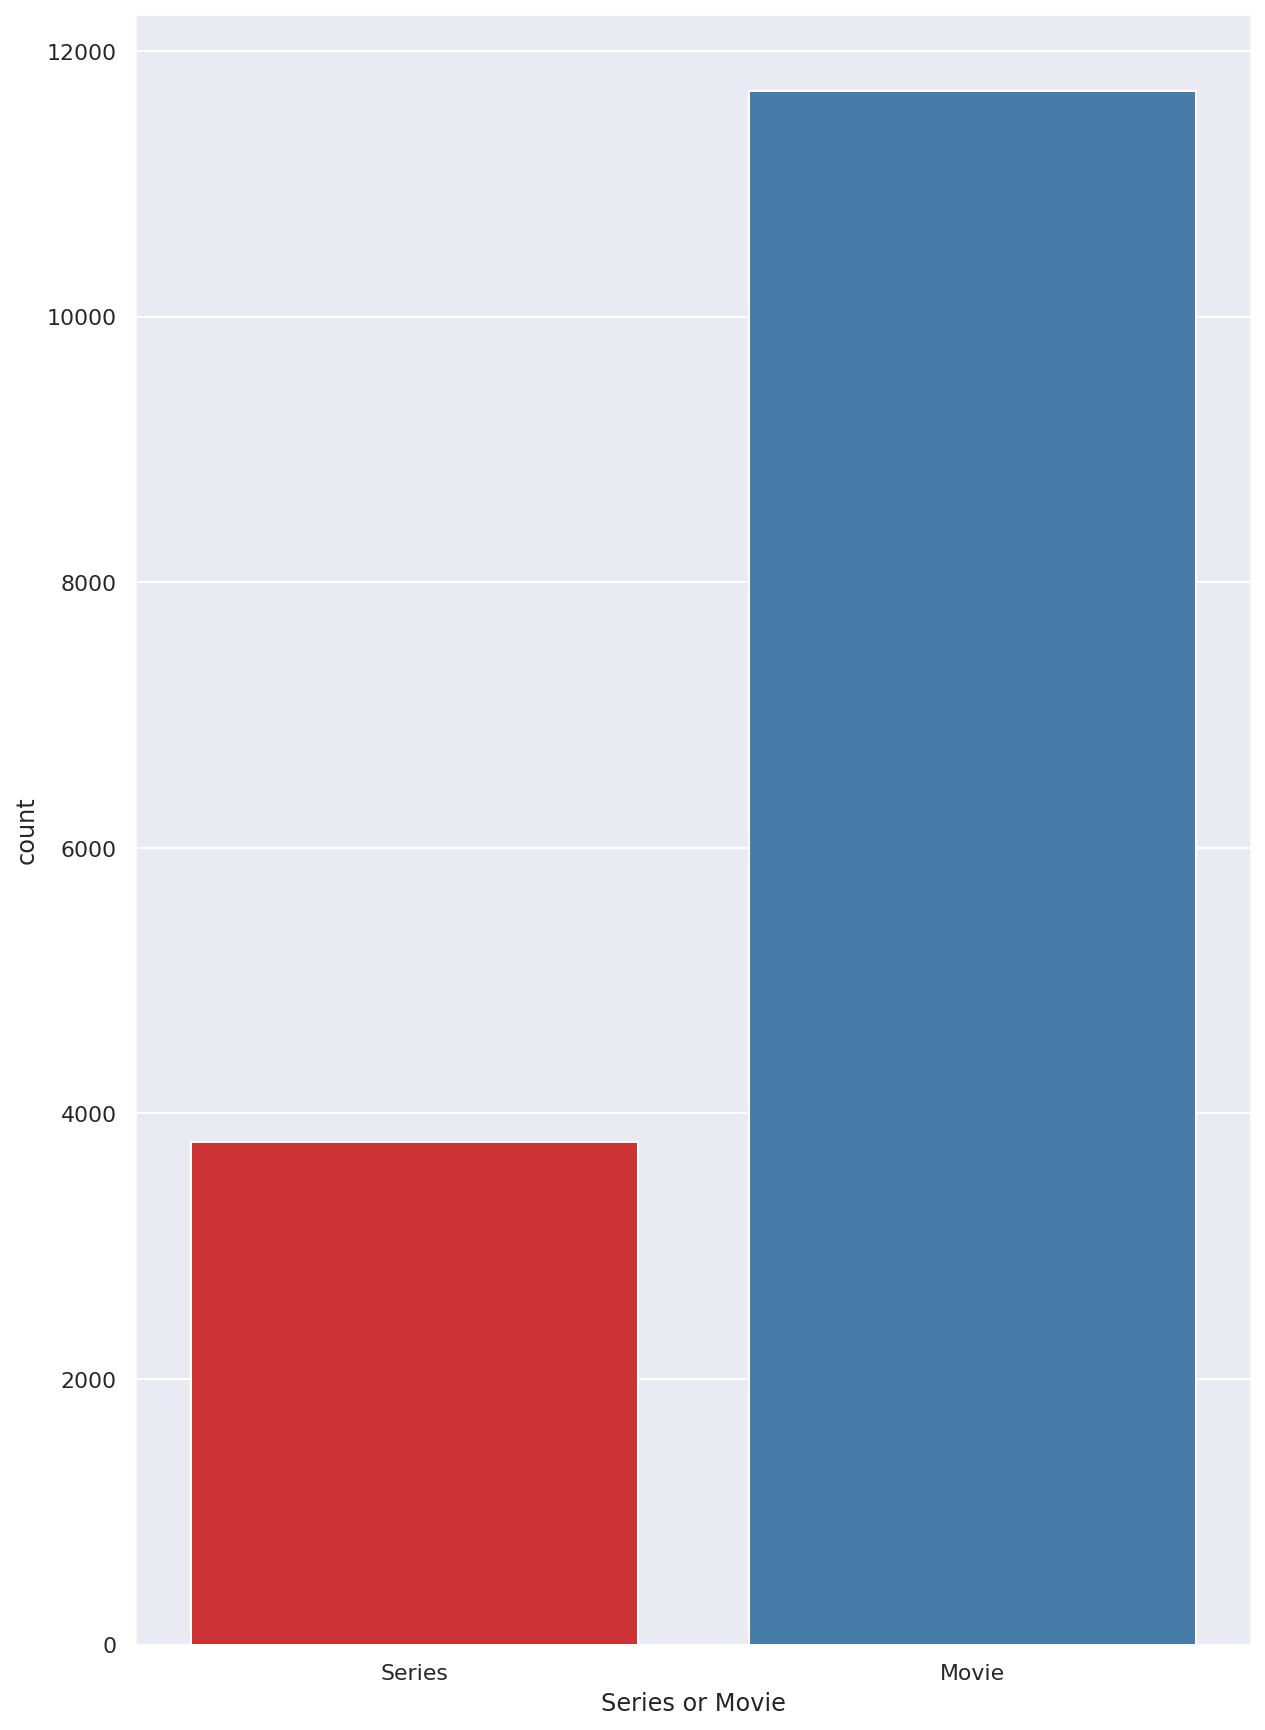

In [4]:
df_movie = df_netflix_movie[df_netflix_movie['Series or Movie']=='Movie']
df_series = df_netflix_movie[df_netflix_movie['Series or Movie']=='Series']
sns.set(style="darkgrid")
ax = sns.countplot(x="Series or Movie", data=df_netflix_movie, palette="Set1")

### IMDb score
In series, IMDb scores of 7-8 are common while in movies, IMDb scores from 6-7 are highest!

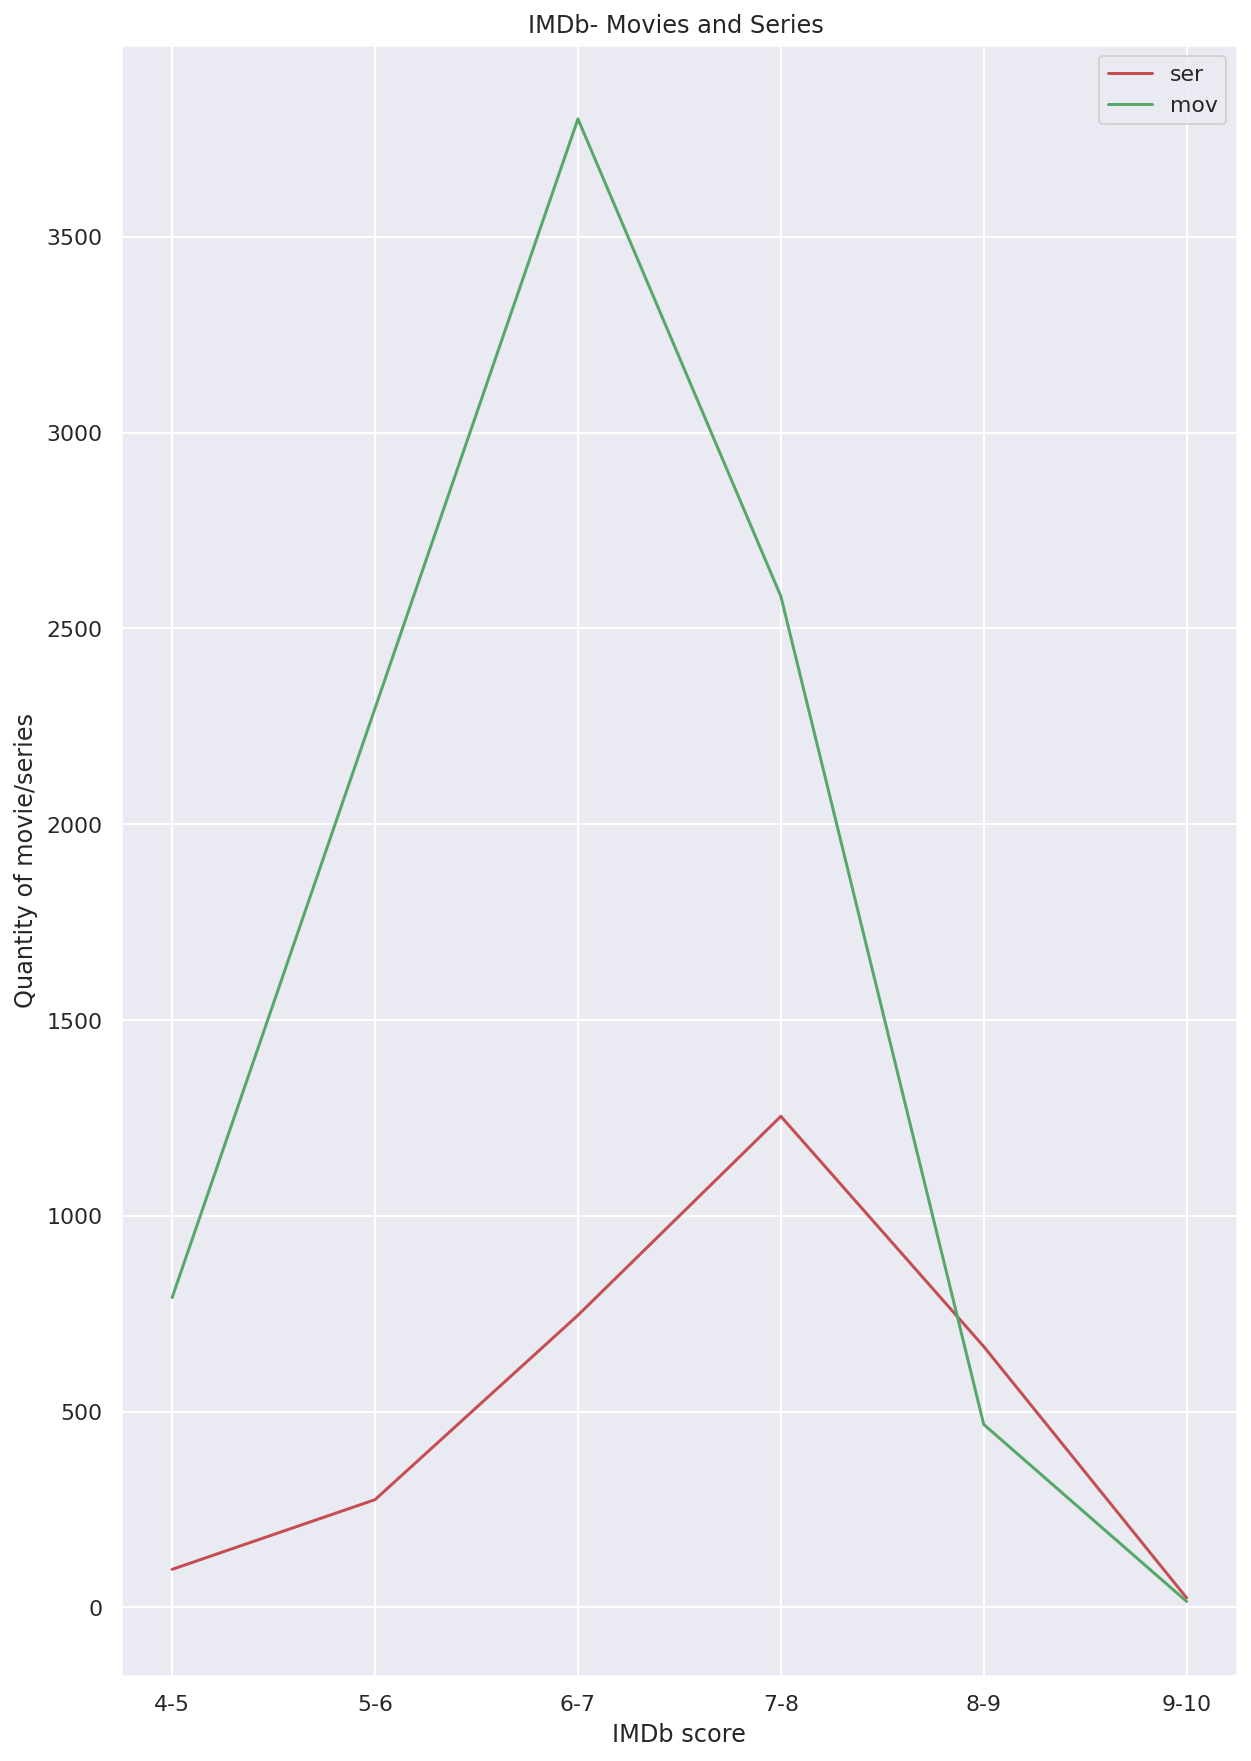

In [5]:
df4 = df_series[(df_series['IMDb Score']>=4.0) & (df_series['IMDb Score']<5.0)]
df5 = df_series[(df_series['IMDb Score']>=5.0) & (df_series['IMDb Score']<6.0)]
df6 = df_series[(df_series['IMDb Score']>=6.0) & (df_series['IMDb Score']<7.0)]
df7 = df_series[(df_series['IMDb Score']>=7.0) & (df_series['IMDb Score']<8.0)]
df8 = df_series[(df_series['IMDb Score']>=8.0) & (df_series['IMDb Score']<9.0)]
df9 = df_series[(df_series['IMDb Score']>=9.0) & (df_series['IMDb Score']<10.0)]
len(df4)
len(df5)
len(df6)
len(df7)
len(df8)
len(df9)
datas= [['4-5' ,len(df4) ] , ['5-6',len(df5)] , [ '6-7',len(df6)], [ '7-8',len(df7)], [ '8-9',len(df8)],[ '9-10',len(df9)]] 
ssi = pd.DataFrame(datas, columns = ['IMDb Rating', 'Series'])
 
df4 = df_movie[(df_movie['IMDb Score']>=4.0) & (df_movie['IMDb Score']<5.0)]
df5 = df_movie[(df_movie['IMDb Score']>=5.0) & (df_movie['IMDb Score']<6.0)]
df6 = df_movie[(df_movie['IMDb Score']>=6.0) & (df_movie['IMDb Score']<7.0)]
df7 = df_movie[(df_movie['IMDb Score']>=7.0) & (df_movie['IMDb Score']<8.0)]
df8 = df_movie[(df_movie['IMDb Score']>=8.0) & (df_movie['IMDb Score']<9.0)]
df9 = df_movie[(df_movie['IMDb Score']>=9.0) & (df_movie['IMDb Score']<10.0)]
len(df4)
len(df5)
len(df6)
len(df7)
len(df8)
len(df9)
datam= [['4-5' ,len(df4) ] , ['5-6',len(df5)] , [ '6-7',len(df6)], [ '7-8',len(df7)], [ '8-9',len(df8)],[ '9-10',len(df9)]] 
mmi = pd.DataFrame(datam, columns = ['IMDb Rating', 'Movies'])
  
# Plotting both the curves simultaneously
plt.plot(ssi['IMDb Rating'],ssi['Series'], color='r',label='ser')
plt.plot(mmi['IMDb Rating'],mmi['Movies'] ,color='g',label='mov')

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("IMDb score")
plt.ylabel("Quantity of movie/series")
plt.title("IMDb- Movies and Series ")
plt.legend()
plt.show()


### Genre 
Drama wins followed by Comedy

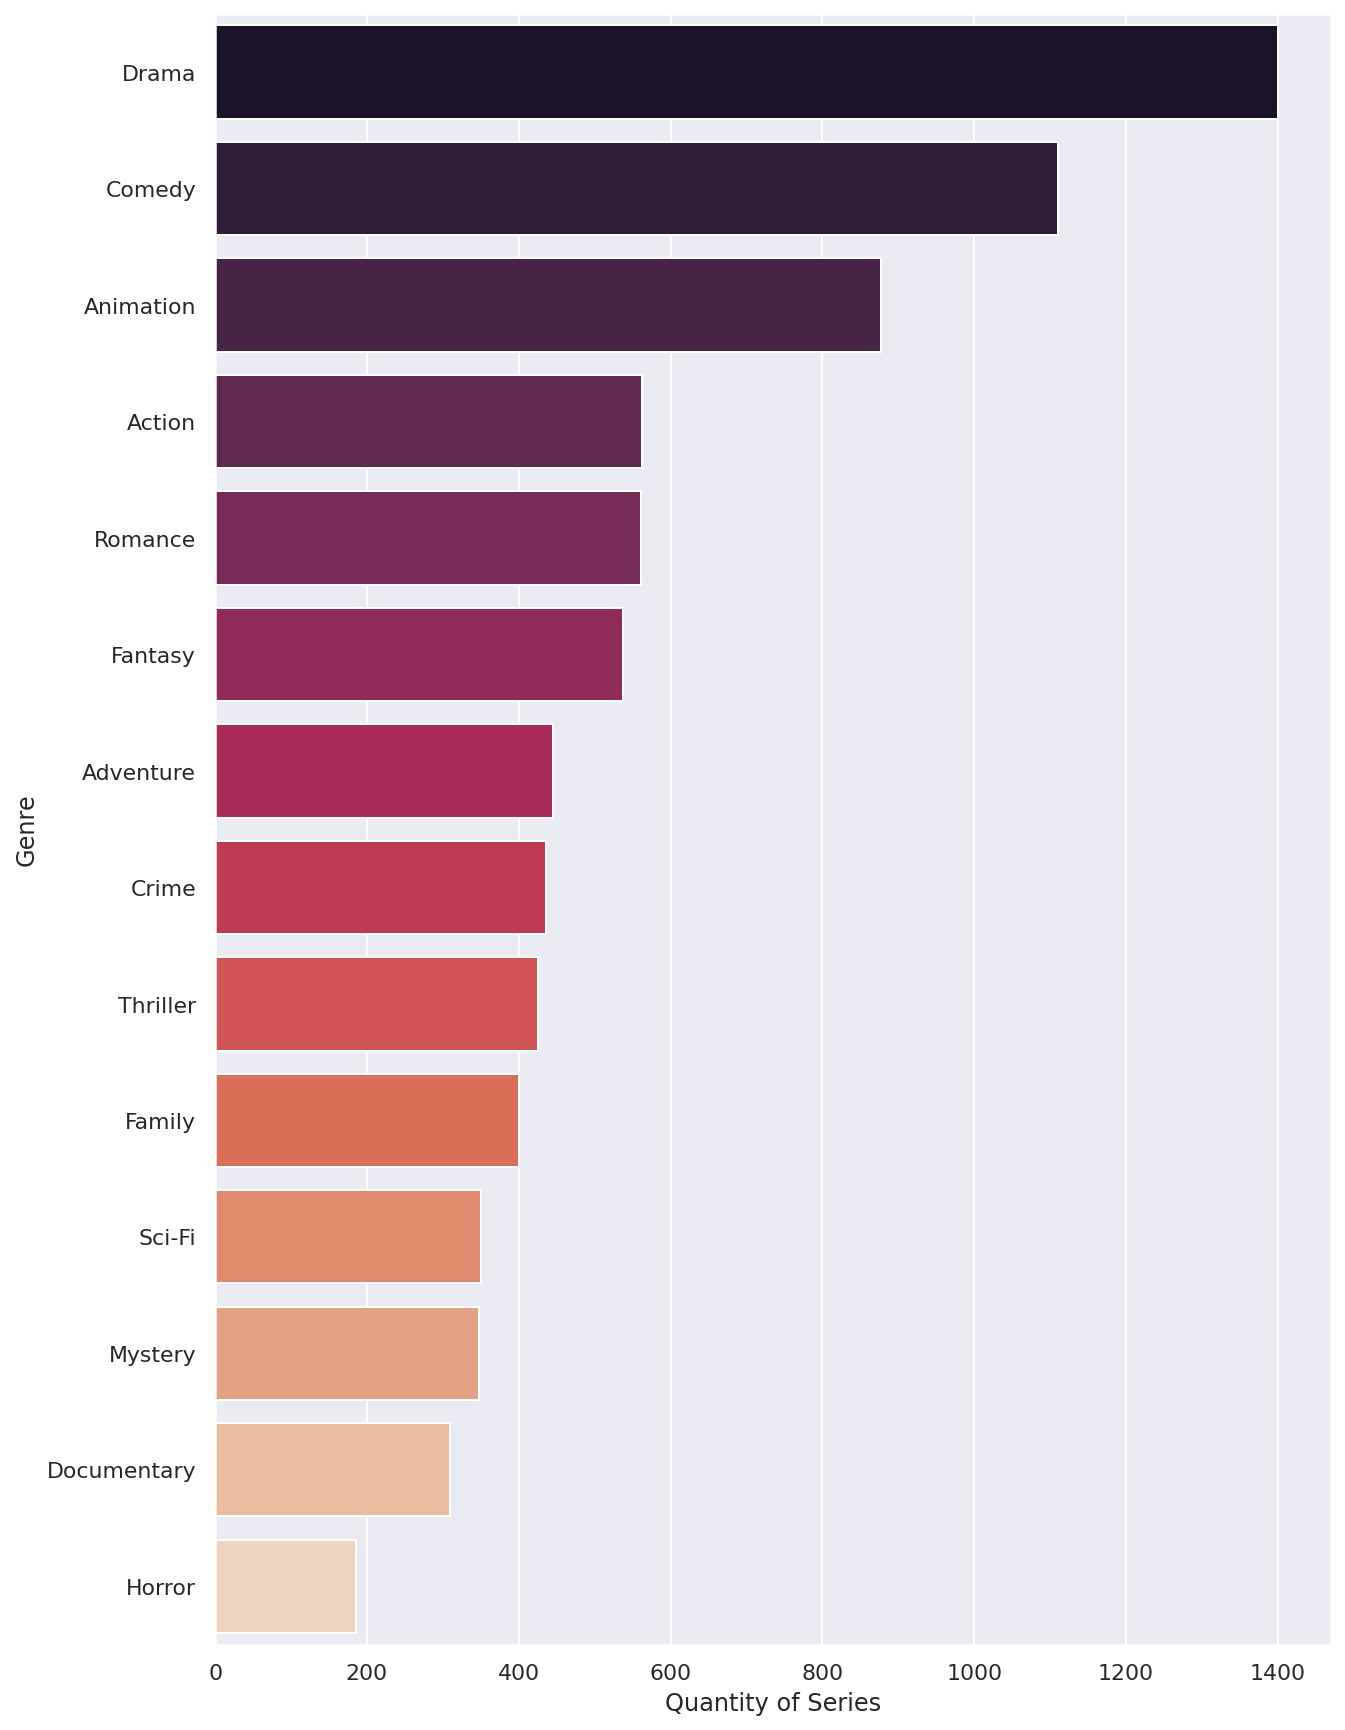

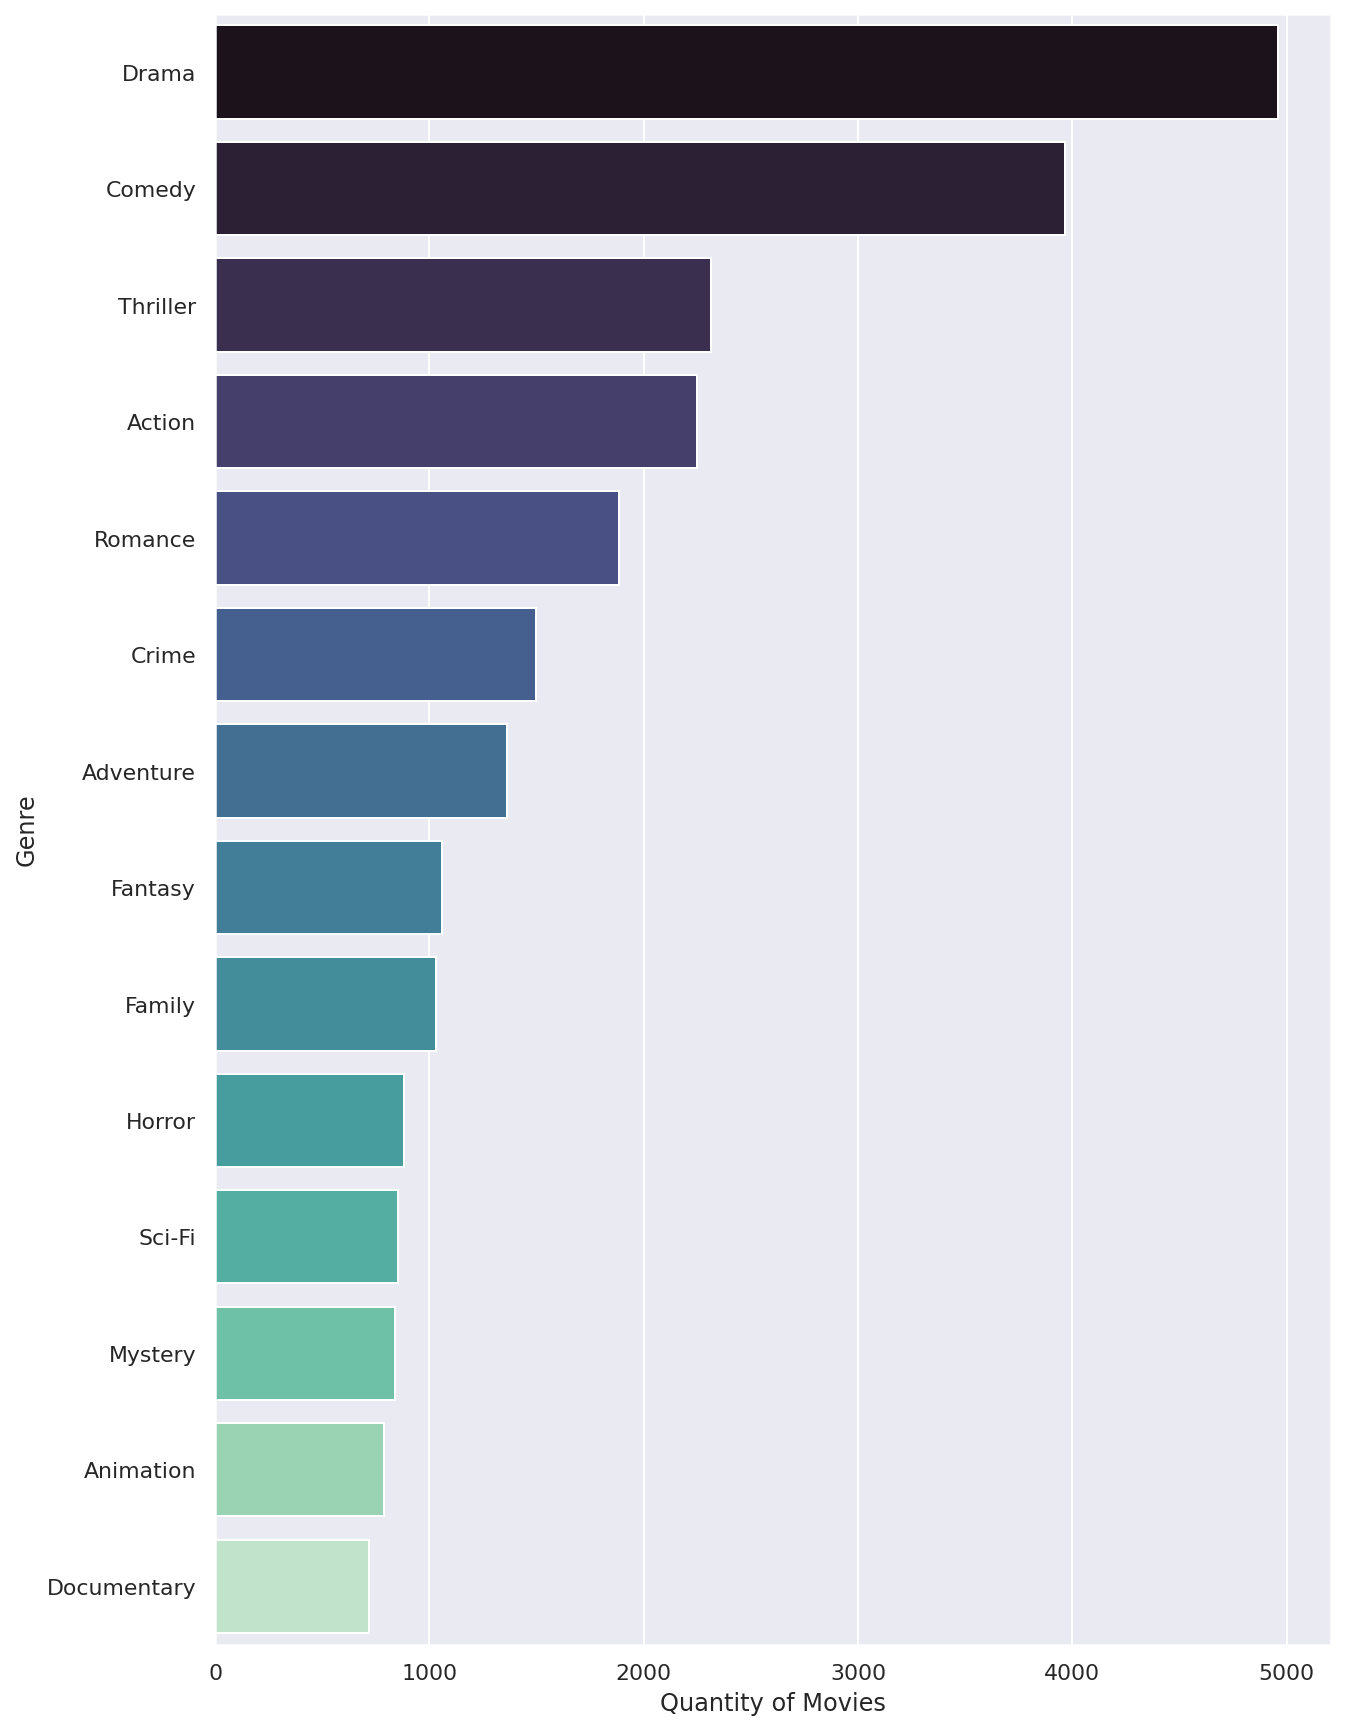

In [6]:

ssg=df_series['Genre'].str.split(',\s+', expand=True).stack().value_counts()
mmg=df_movie['Genre'].str.split(',\s+', expand=True).stack().value_counts()


ax=sns.barplot(x=ssg.values[0:14], y=ssg.index[0:14], palette="rocket")
ax.set(xlabel='Quantity of Series', ylabel='Genre')
plt.show()

ax2=sns.barplot(x=mmg.values[0:14], y=mmg.index[0:14], palette="mako")
ax2.set(xlabel='Quantity of Movies', ylabel='Genre')
plt.show()



### Language Distribution
English has maximum popularity here

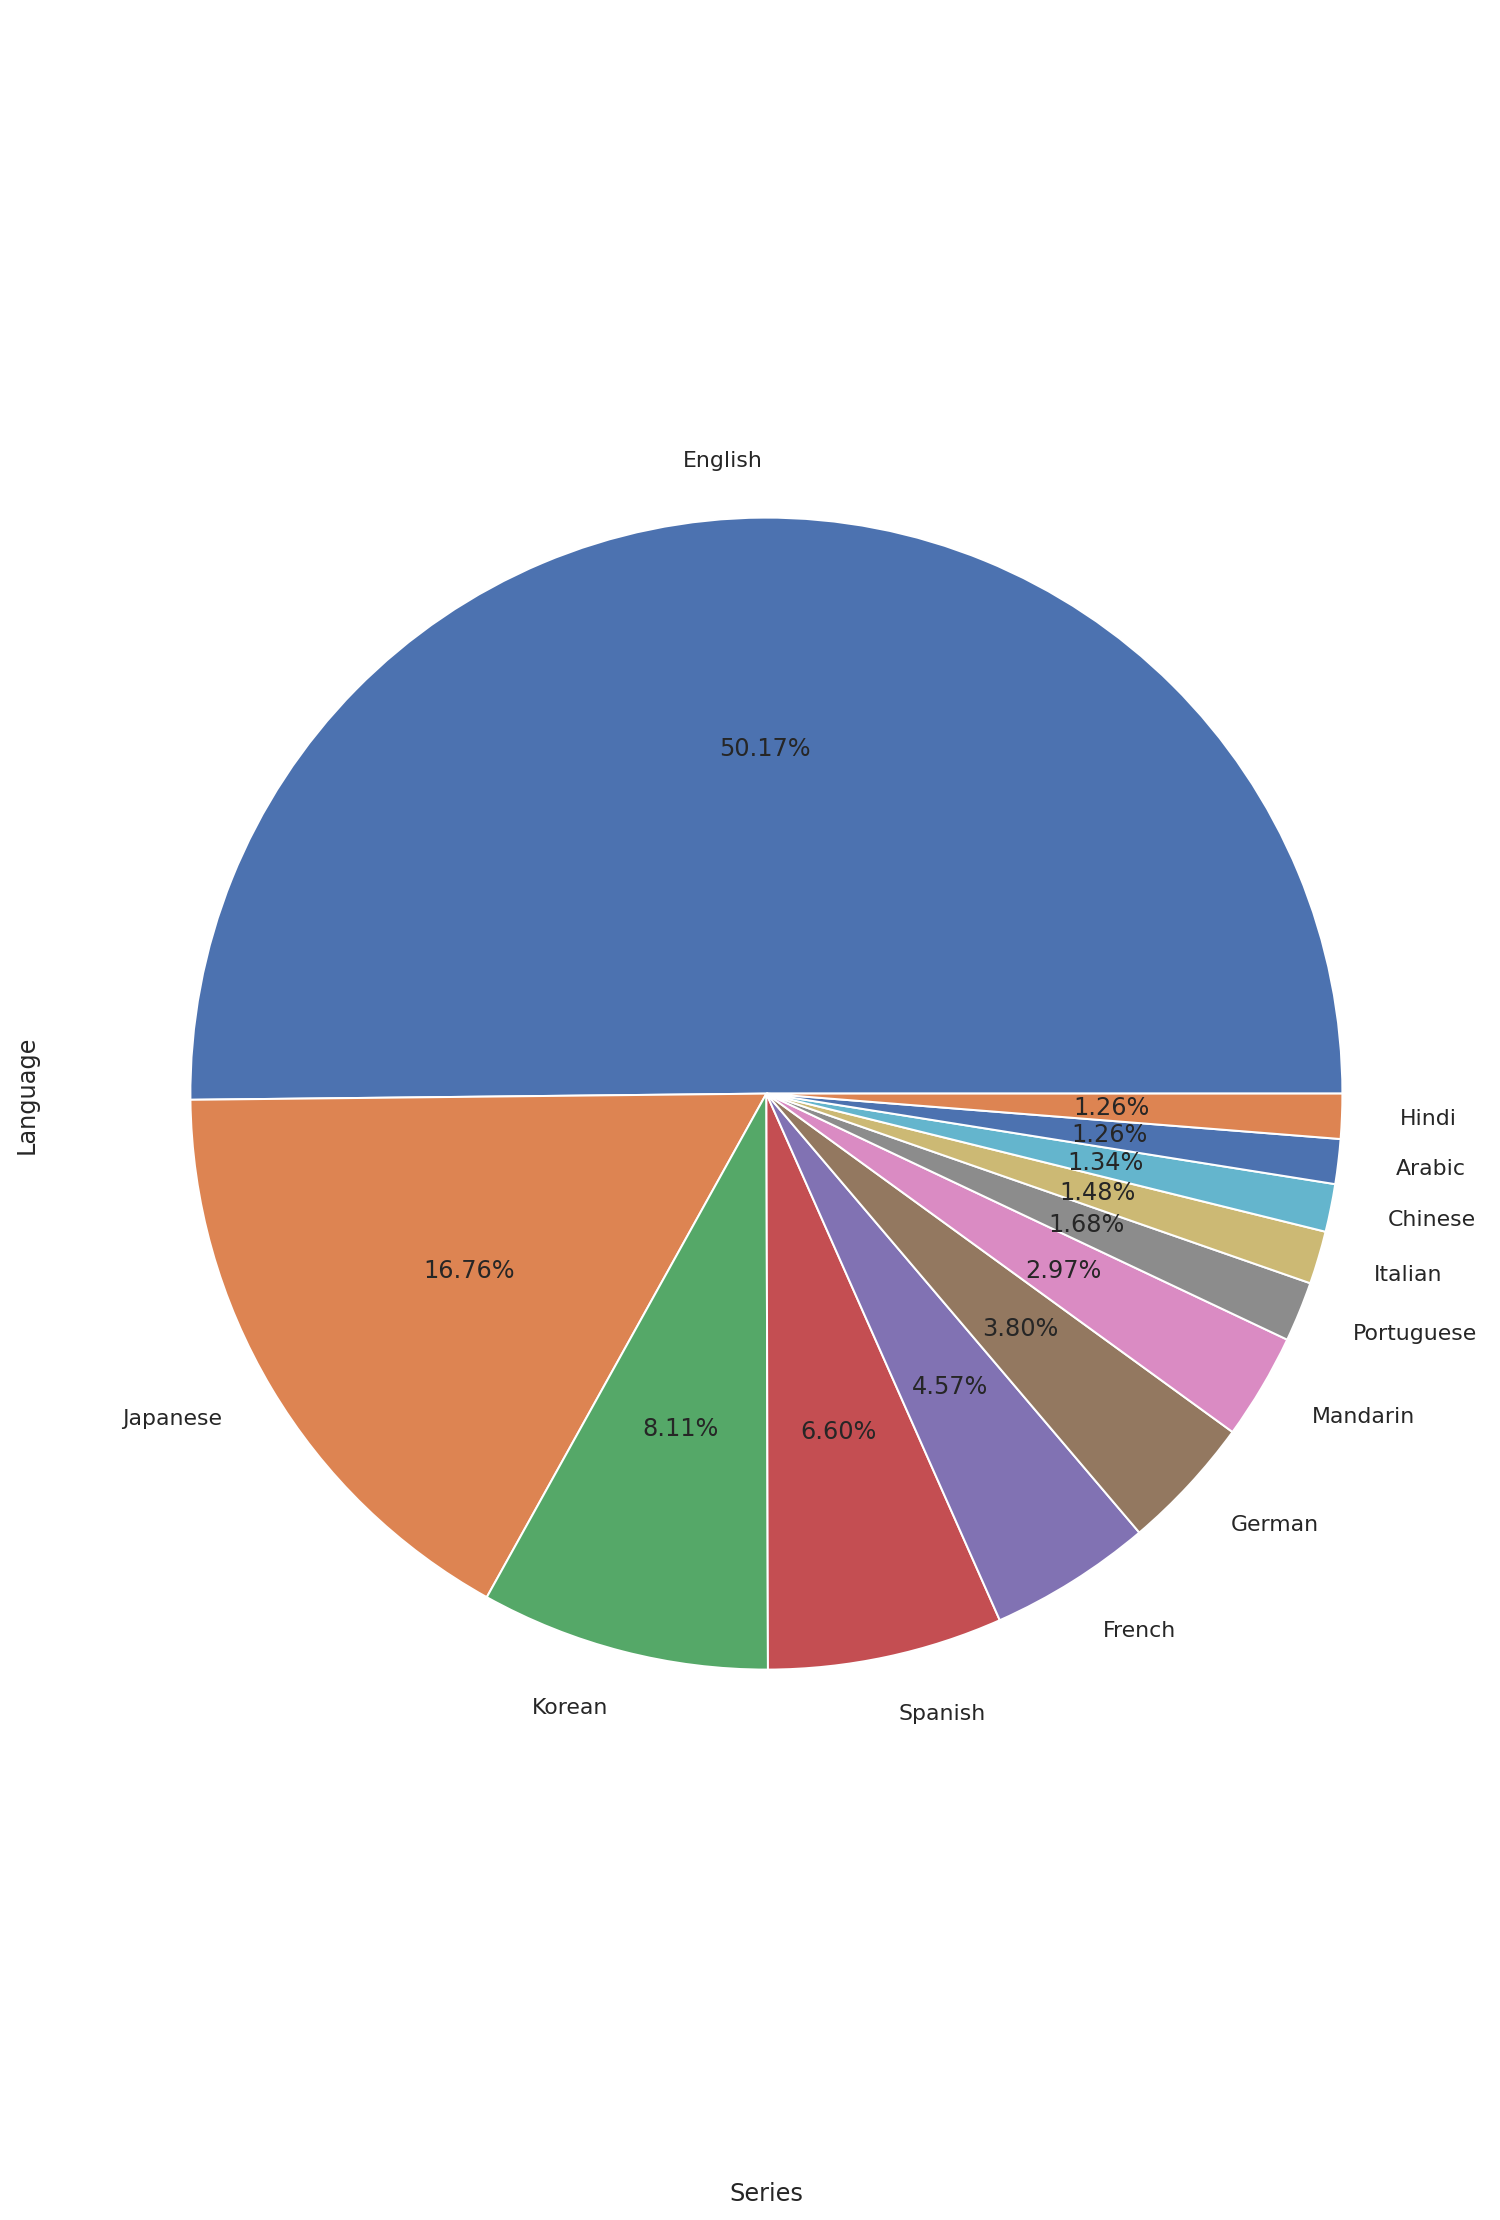

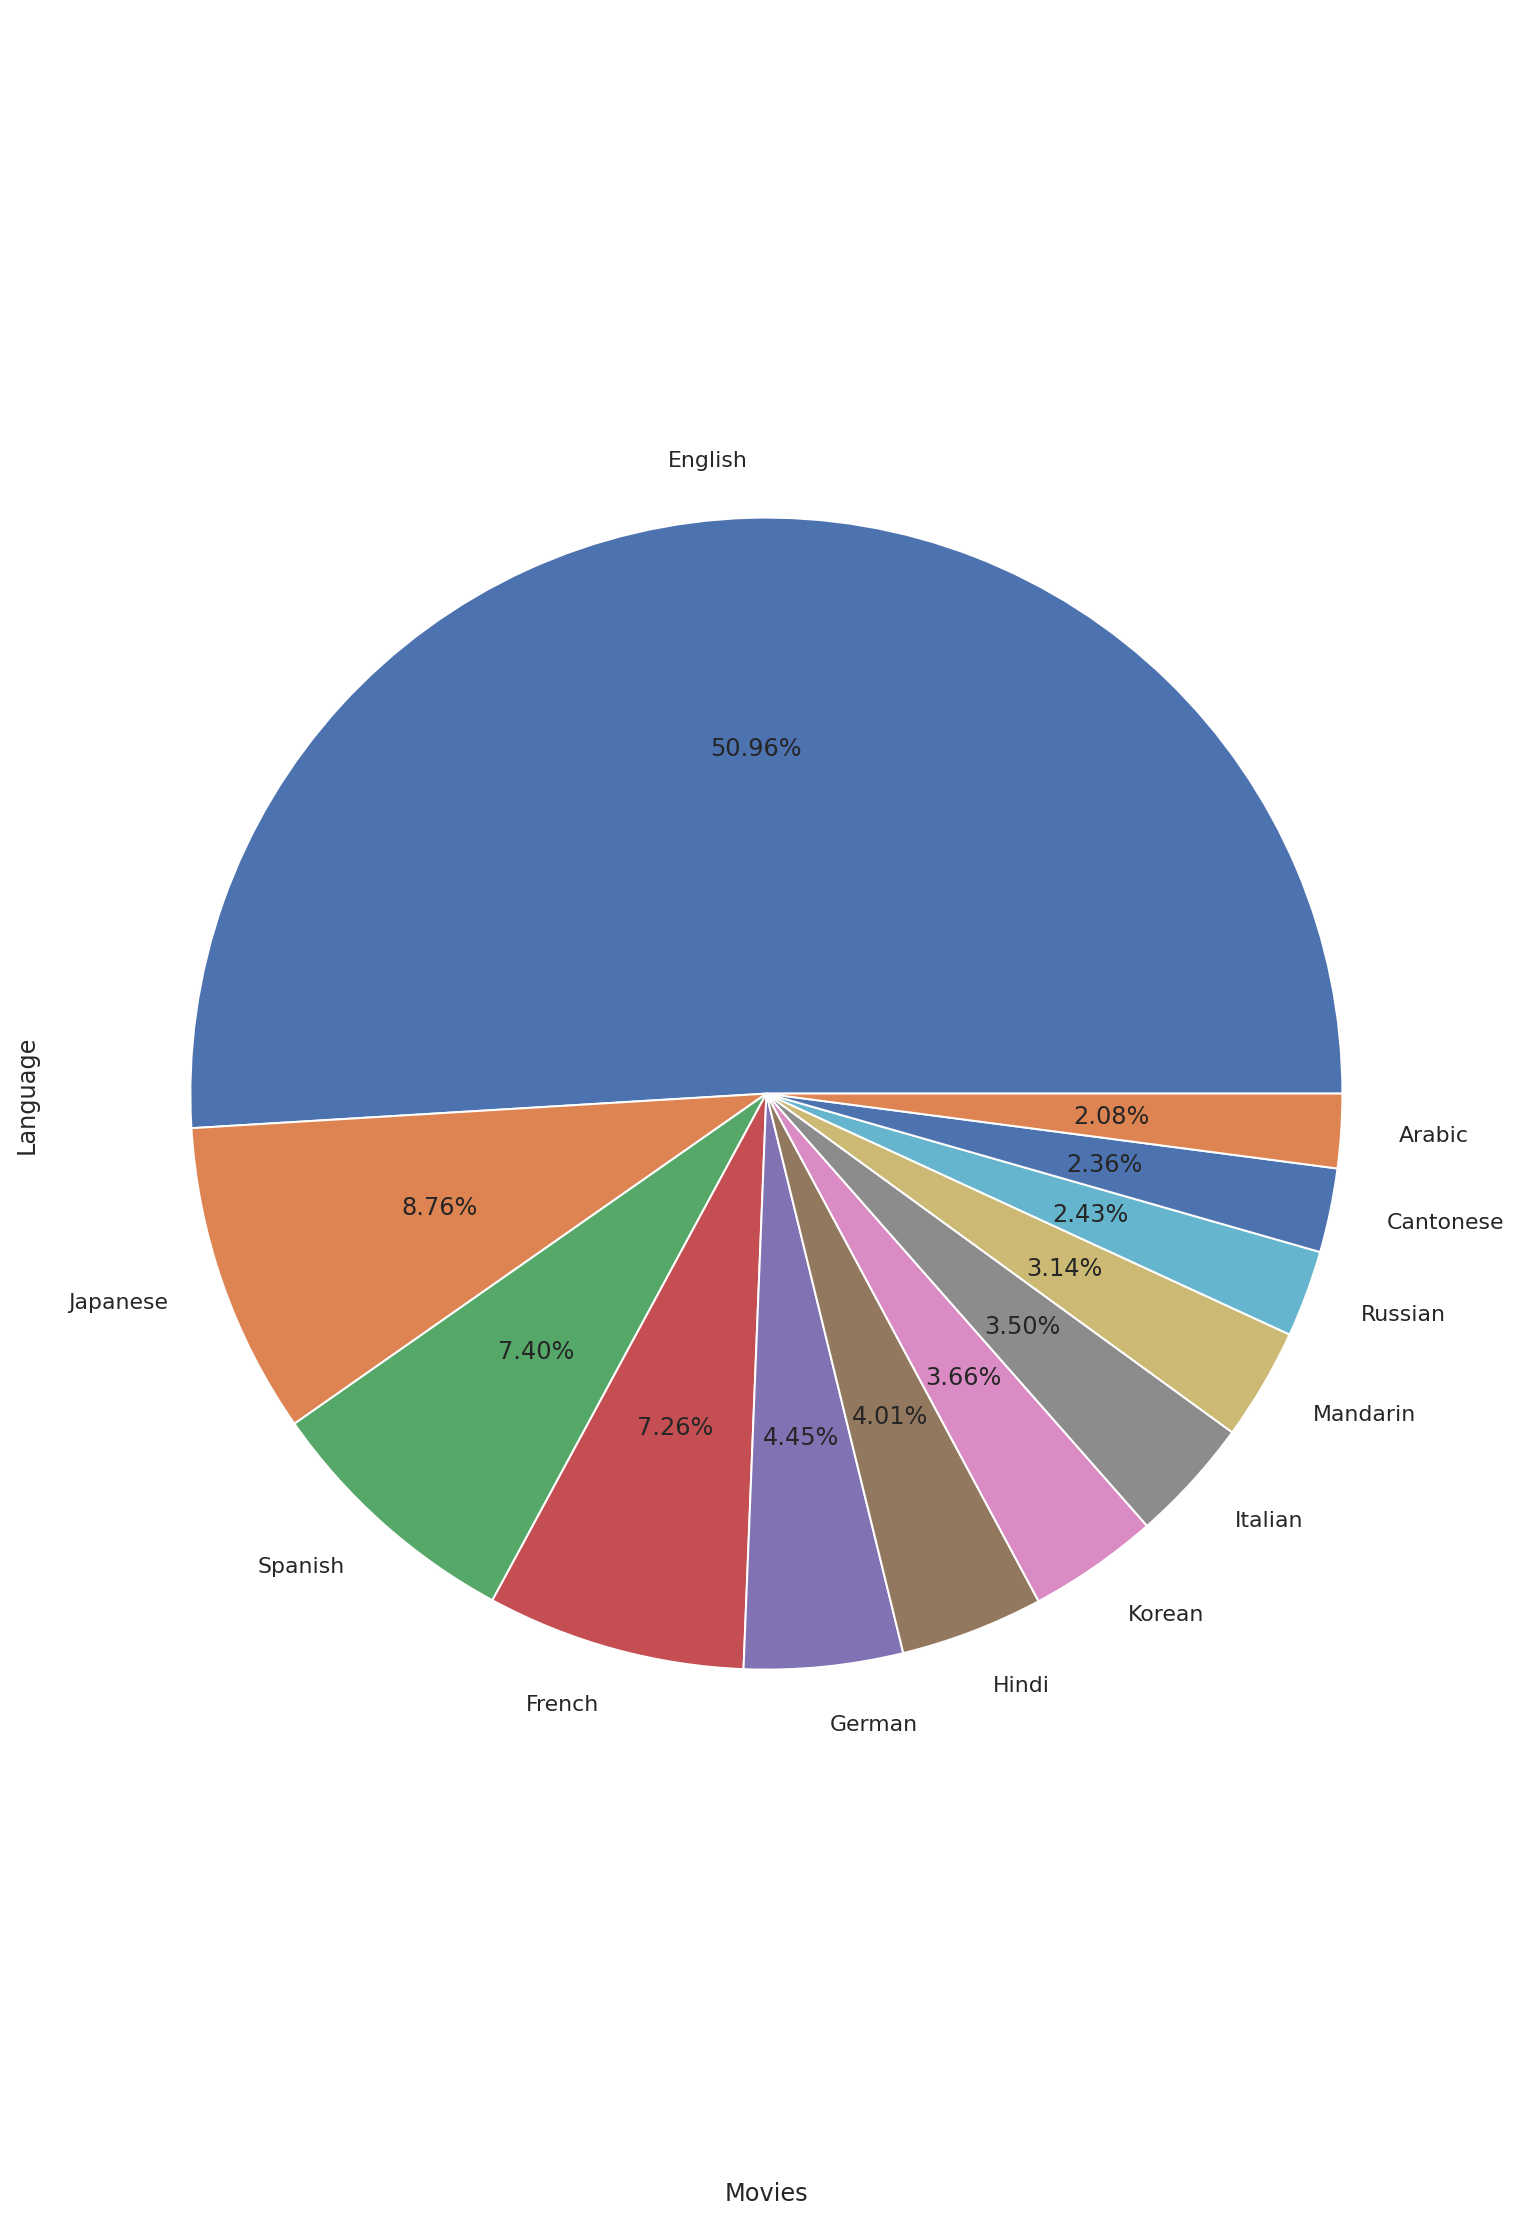

In [7]:
ssl=df_series['Languages'].str.split(',\s+', expand=True).stack().value_counts()
mml=df_movie['Languages'].str.split(',\s+', expand=True).stack().value_counts()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(ssl.values[0:12], labels = ssl.index[0:12],autopct='%1.2f%%')
ax.set(xlabel='Series', ylabel='Language')
plt.show()

fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])
ax2.axis('equal')
ax2.set(xlabel='Movies', ylabel='Language')
ax2.pie(mml.values[0:12], labels = mml.index[0:12],autopct='%1.2f%%')
plt.show()

### Age Rating
18+ is the most prominent Age Rating 

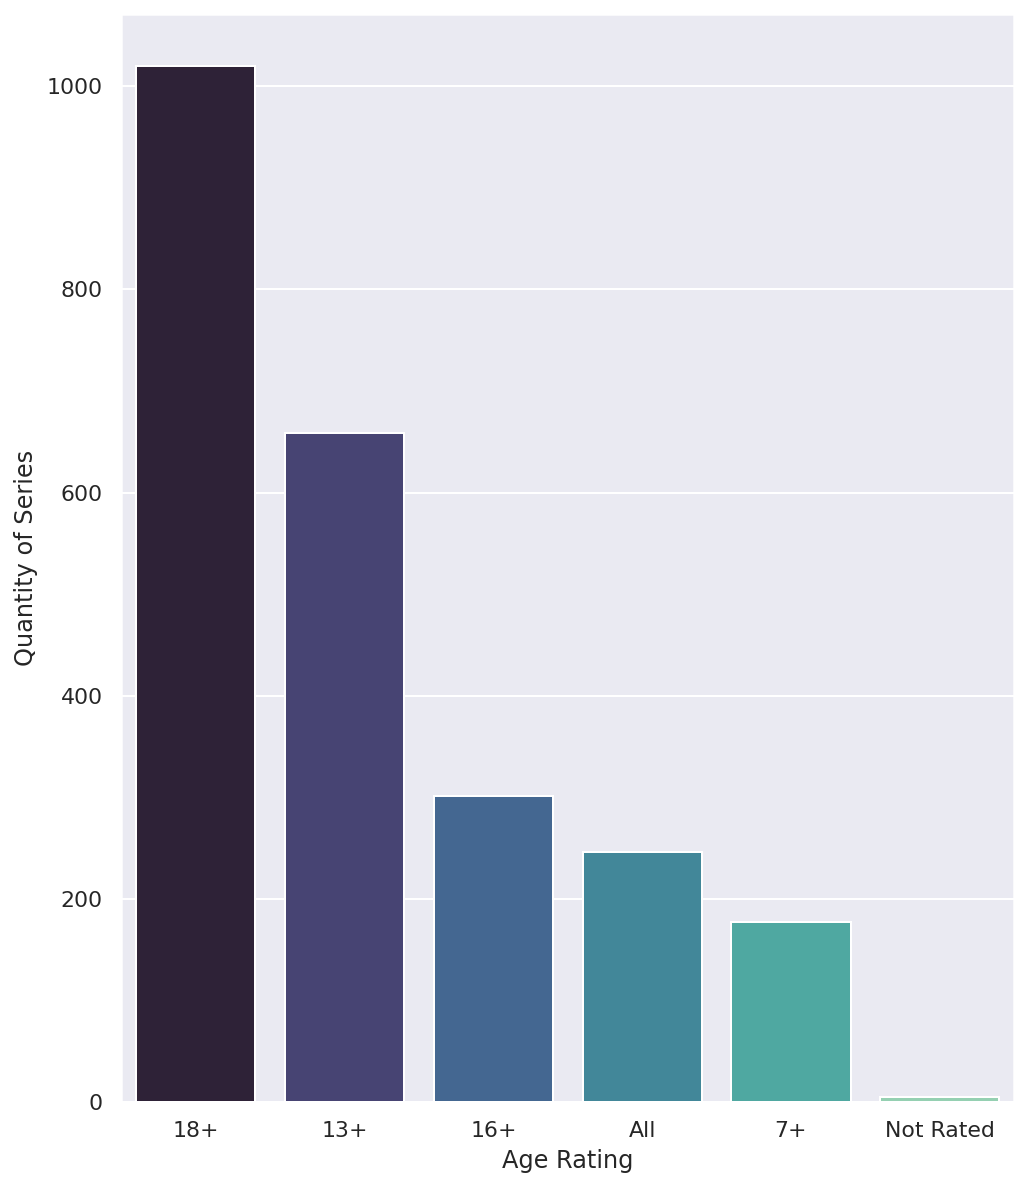

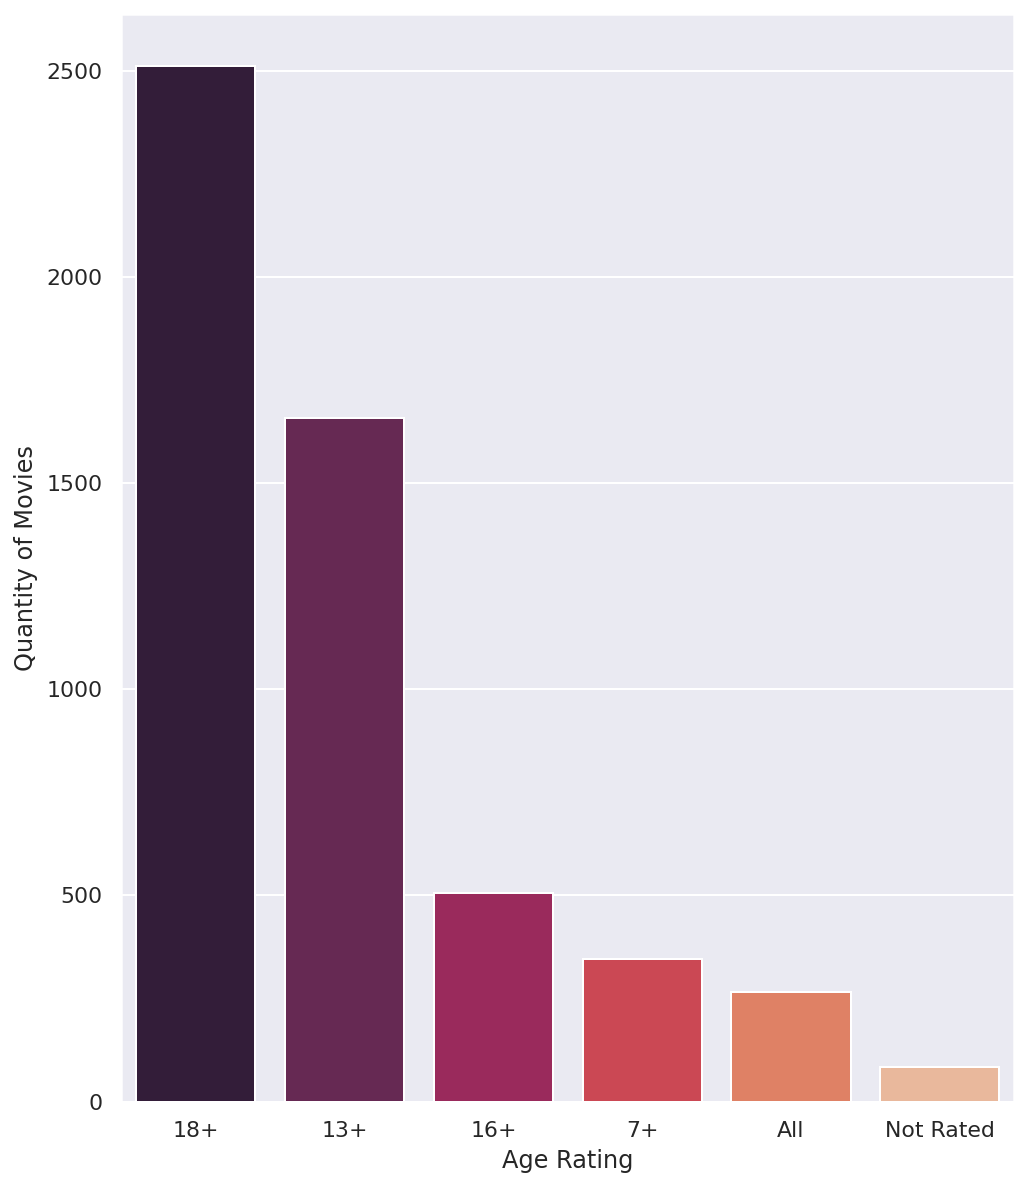

In [8]:
md2=df_netflix_shows[df_netflix_shows['type']=='Movie']
sd2=df_netflix_shows[df_netflix_shows['type']=='TV Show']


s_ratings_ages = {
    'TV-MA': '18+',
'TV-14': '13+',
'TV-PG': '16+',
'TV-Y7': '7+',
'TV-Y': 'All',
'TV-G': 'All',
'NR': 'Not Rated',
'R': '18+',
'TV-Y7-FV':'7+'
}
m_ratings_ages={
'TV-MA': '18+',
'TV-14': '13+',
'PG-13': '13+',
'TV-PG': '16+',
'TV-Y7': '7+',
'PG':'7+',
'G': 'All',
'TV-Y': 'All',
'TV-G': 'All',
'NR':'Not Rated',
'UR':'Not Rated',
'R': '18+',
'NC-17': '18+',
'TV-Y7-FV':'7+'
}
sd2['rating']=sd2['rating'].replace(s_ratings_ages)

md2['rating']=md2['rating'].replace(m_ratings_ages)
s_rate=sd2['rating'].value_counts()
m_rate=md2['rating'].value_counts()

plt.figure(figsize=(8,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=sd2, palette="mako", order=sd2['rating'].value_counts().index[0:15])
ax.set(ylabel='Quantity of Series', xlabel='Age Rating')
plt.show()

plt.figure(figsize=(8,10))
sns.set(style="darkgrid")
ax2 = sns.countplot(x="rating", data=md2, palette="rocket", order=md2['rating'].value_counts().index[0:15])
ax2.set(ylabel='Quantity of Movies', xlabel='Age Rating')
plt.show()

# PRIME VIDEO ANAYLYSIS

### IMDb score
In series, IMDb scores of 7-8 are common while in movies, IMDb scores from 6-7 are much more!

In [9]:
mprime= movie[movie['Prime Video']==1]

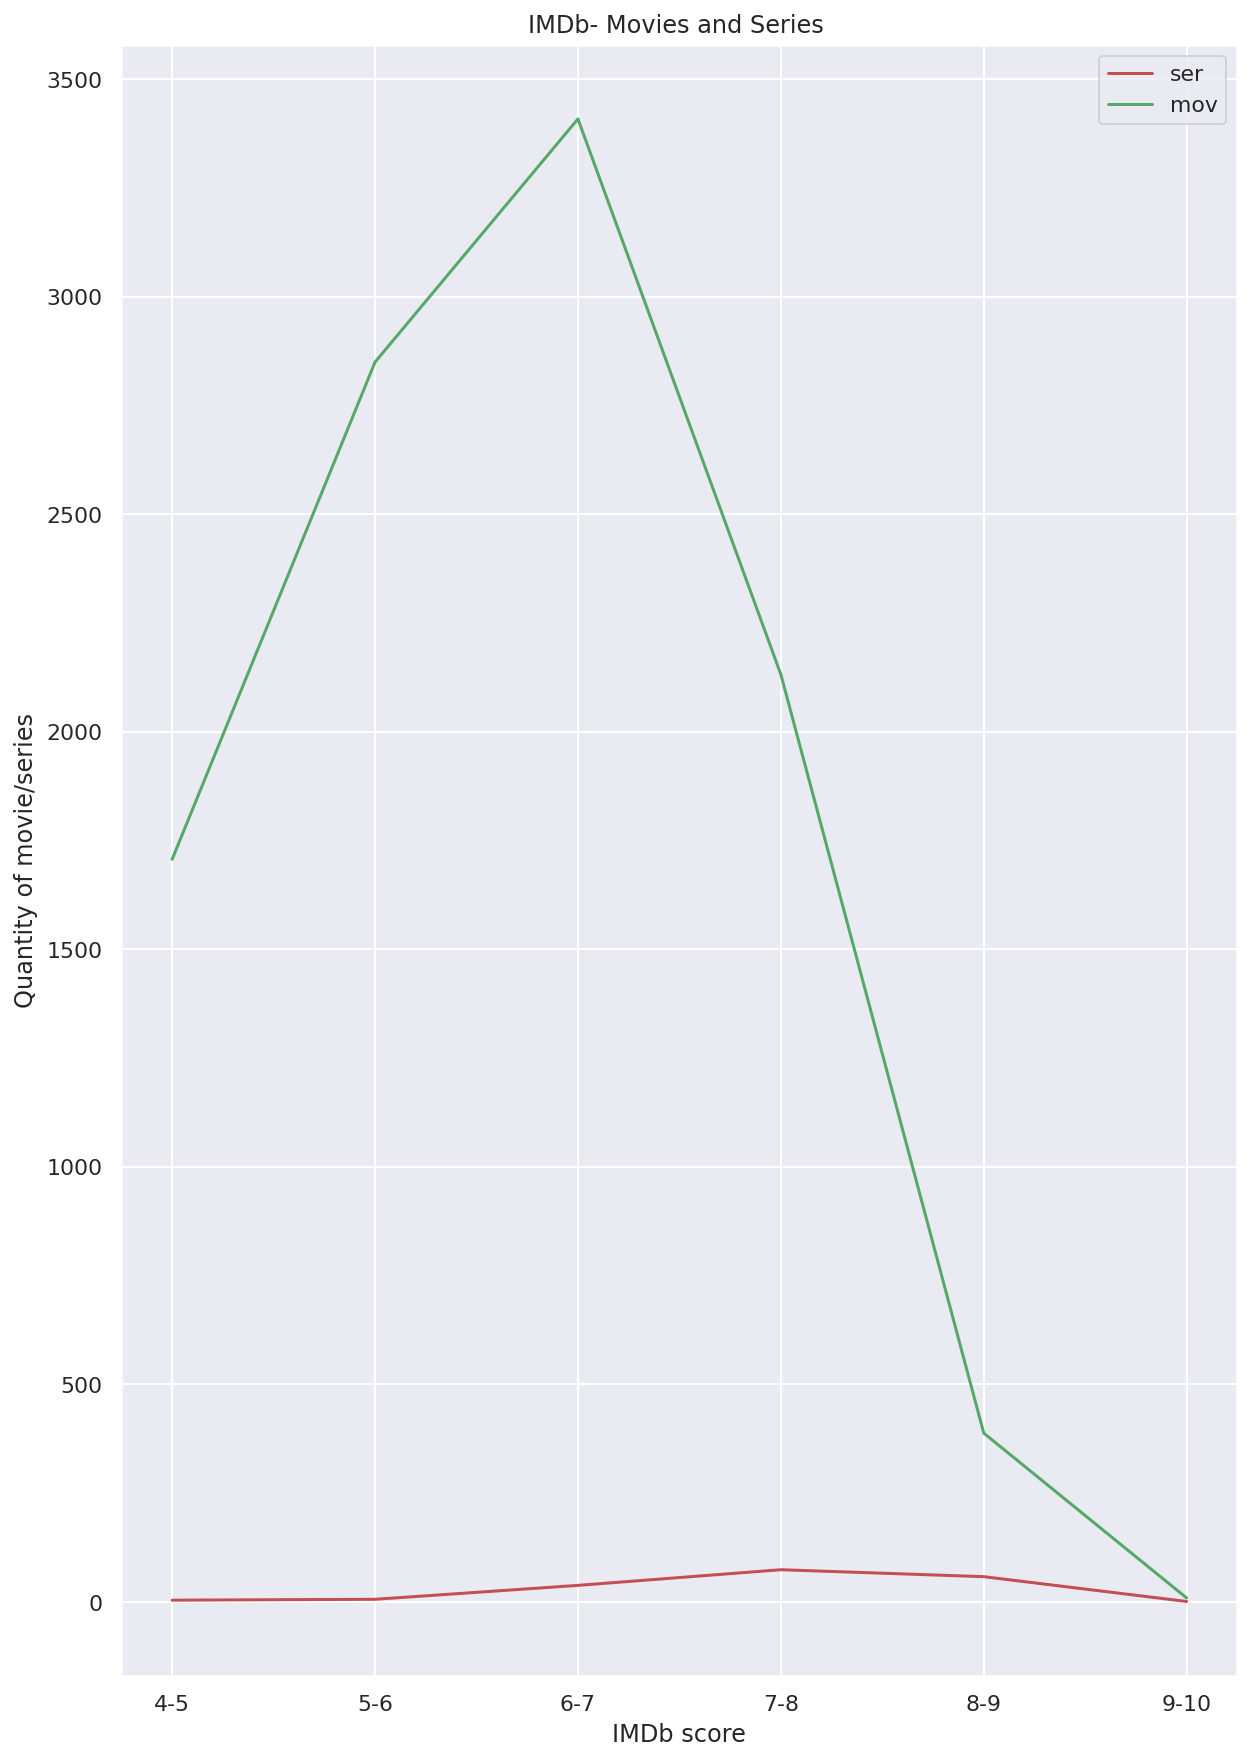

In [10]:
df4 = sprime[(sprime['IMDb rating']>=4.0) & (sprime['IMDb rating']<5.0)]
df5 = sprime[(sprime['IMDb rating']>=5.0) & (sprime['IMDb rating']<6.0)]
df6 = sprime[(sprime['IMDb rating']>=6.0) & (sprime['IMDb rating']<7.0)]
df7 = sprime[(sprime['IMDb rating']>=7.0) & (sprime['IMDb rating']<8.0)]
df8 = sprime[(sprime['IMDb rating']>=8.0) & (sprime['IMDb rating']<9.0)]
df9 = sprime[(sprime['IMDb rating']>=9.0) & (sprime['IMDb rating']<10.0)]
len(df4)
len(df5)
len(df6)
len(df7)
len(df8)
datas= [['4-5' ,len(df4) ] , ['5-6',len(df5)] , [ '6-7',len(df6)], [ '7-8',len(df7)], [ '8-9',len(df8)],[ '9-10',len(df9)]] 
ssi = pd.DataFrame(datas, columns = ['IMDb Rating', 'Series'])
 
df4 = mprime[(mprime['IMDb']>=4.0) & (mprime['IMDb']<5.0)]
df5 = mprime[(mprime['IMDb']>=5.0) & (mprime['IMDb']<6.0)]
df6 = mprime[(mprime['IMDb']>=6.0) & (mprime['IMDb']<7.0)]
df7 = mprime[(mprime['IMDb']>=7.0) & (mprime['IMDb']<8.0)]
df8 = mprime[(mprime['IMDb']>=8.0) & (mprime['IMDb']<9.0)]
df9 = mprime[(mprime['IMDb']>=9.0) & (mprime['IMDb']<10.0)]
len(df4)
len(df5)
len(df6)
len(df7)
len(df8)
datam= [['4-5' ,len(df4) ] , ['5-6',len(df5)] , [ '6-7',len(df6)], [ '7-8',len(df7)], [ '8-9',len(df8)],[ '9-10',len(df9)]] 
mmi = pd.DataFrame(datam, columns = ['IMDb Rating', 'Movies'])

# Plotting both the curves simultaneously
plt.plot(ssi['IMDb Rating'],ssi['Series'], color='r',label='ser')
plt.plot(mmi['IMDb Rating'],mmi['Movies'],color='g',label='mov')

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("IMDb score")
plt.ylabel("Quantity of movie/series")
plt.title("IMDb- Movies and Series ")
plt.legend()
plt.show()


### Genre 
Drama wins followed by Comedy

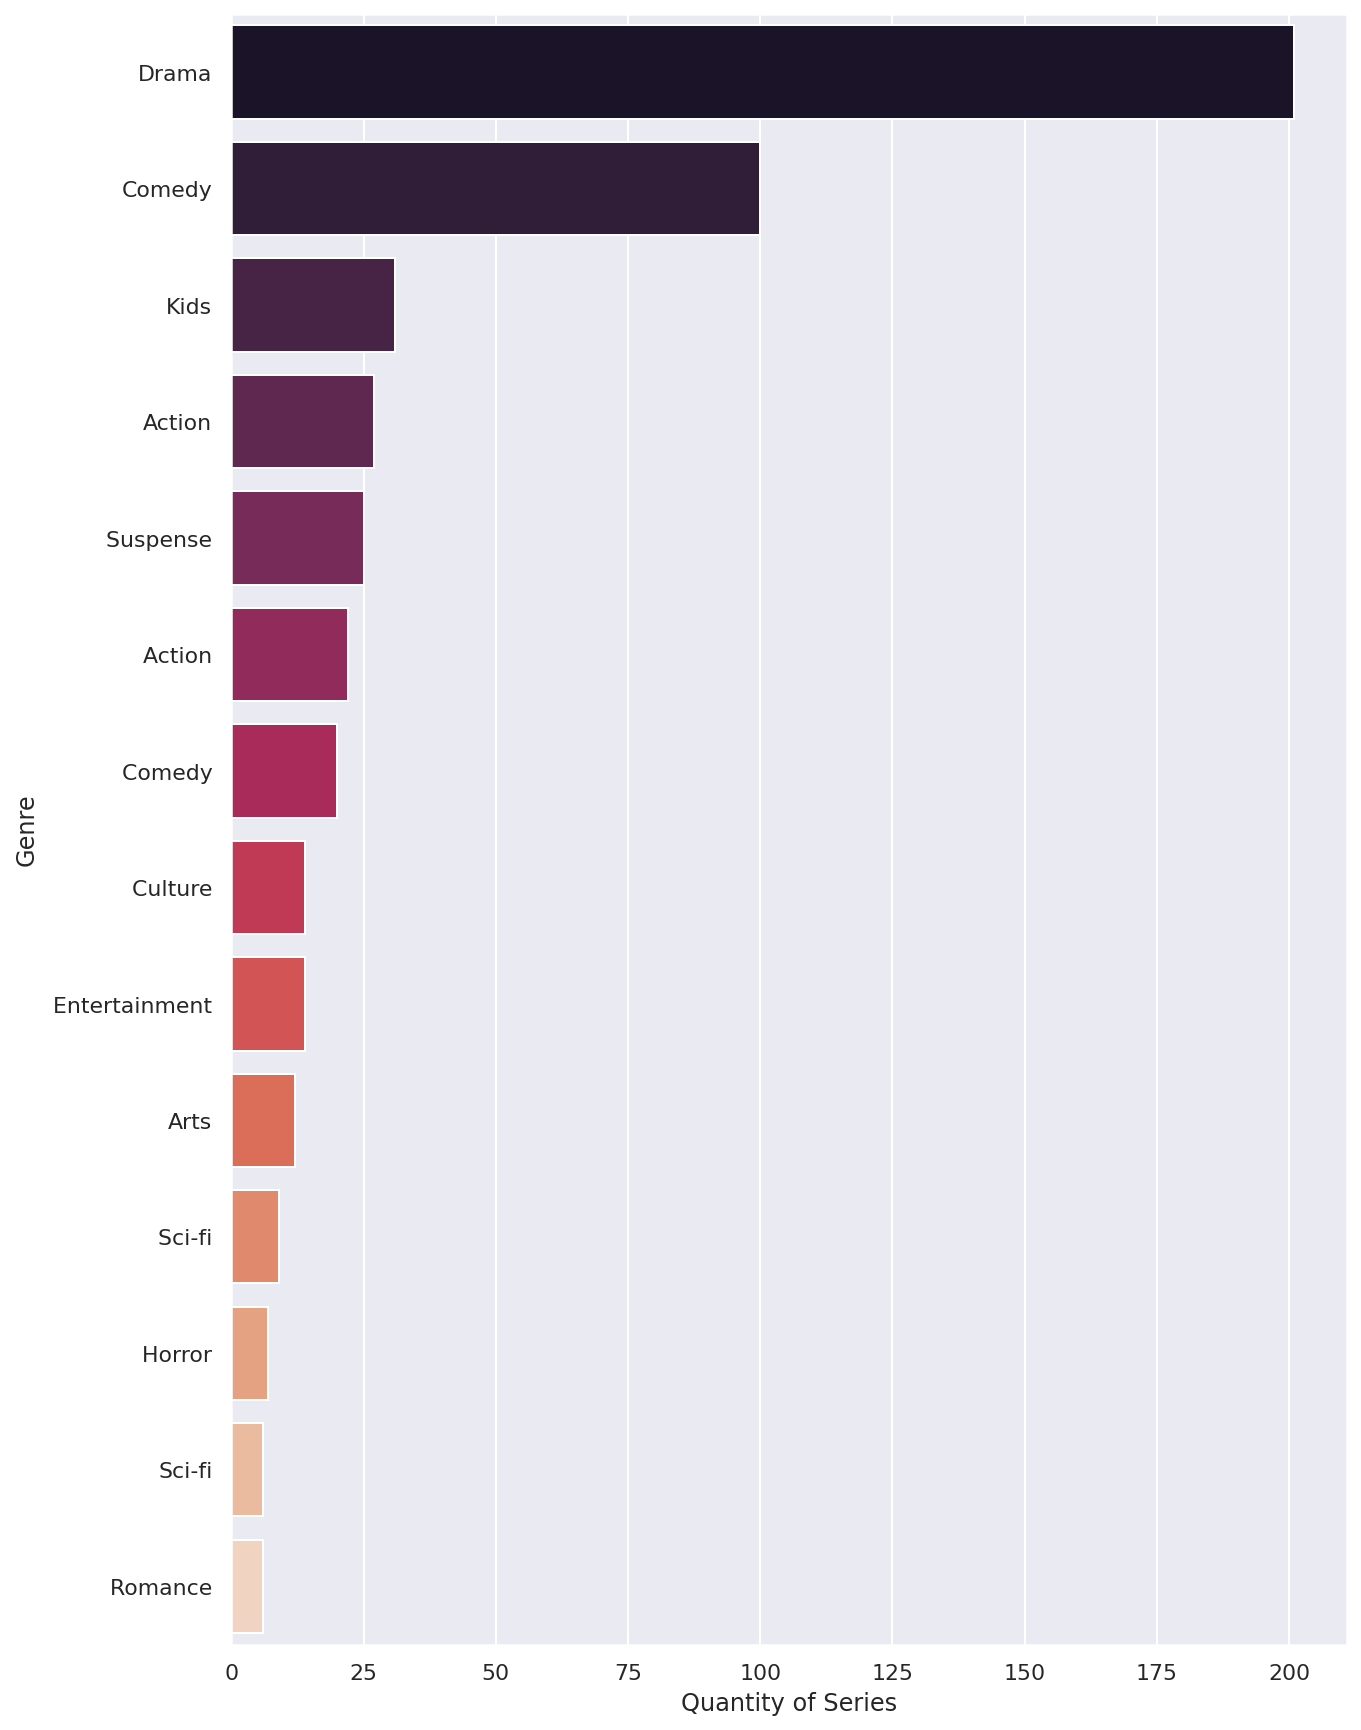

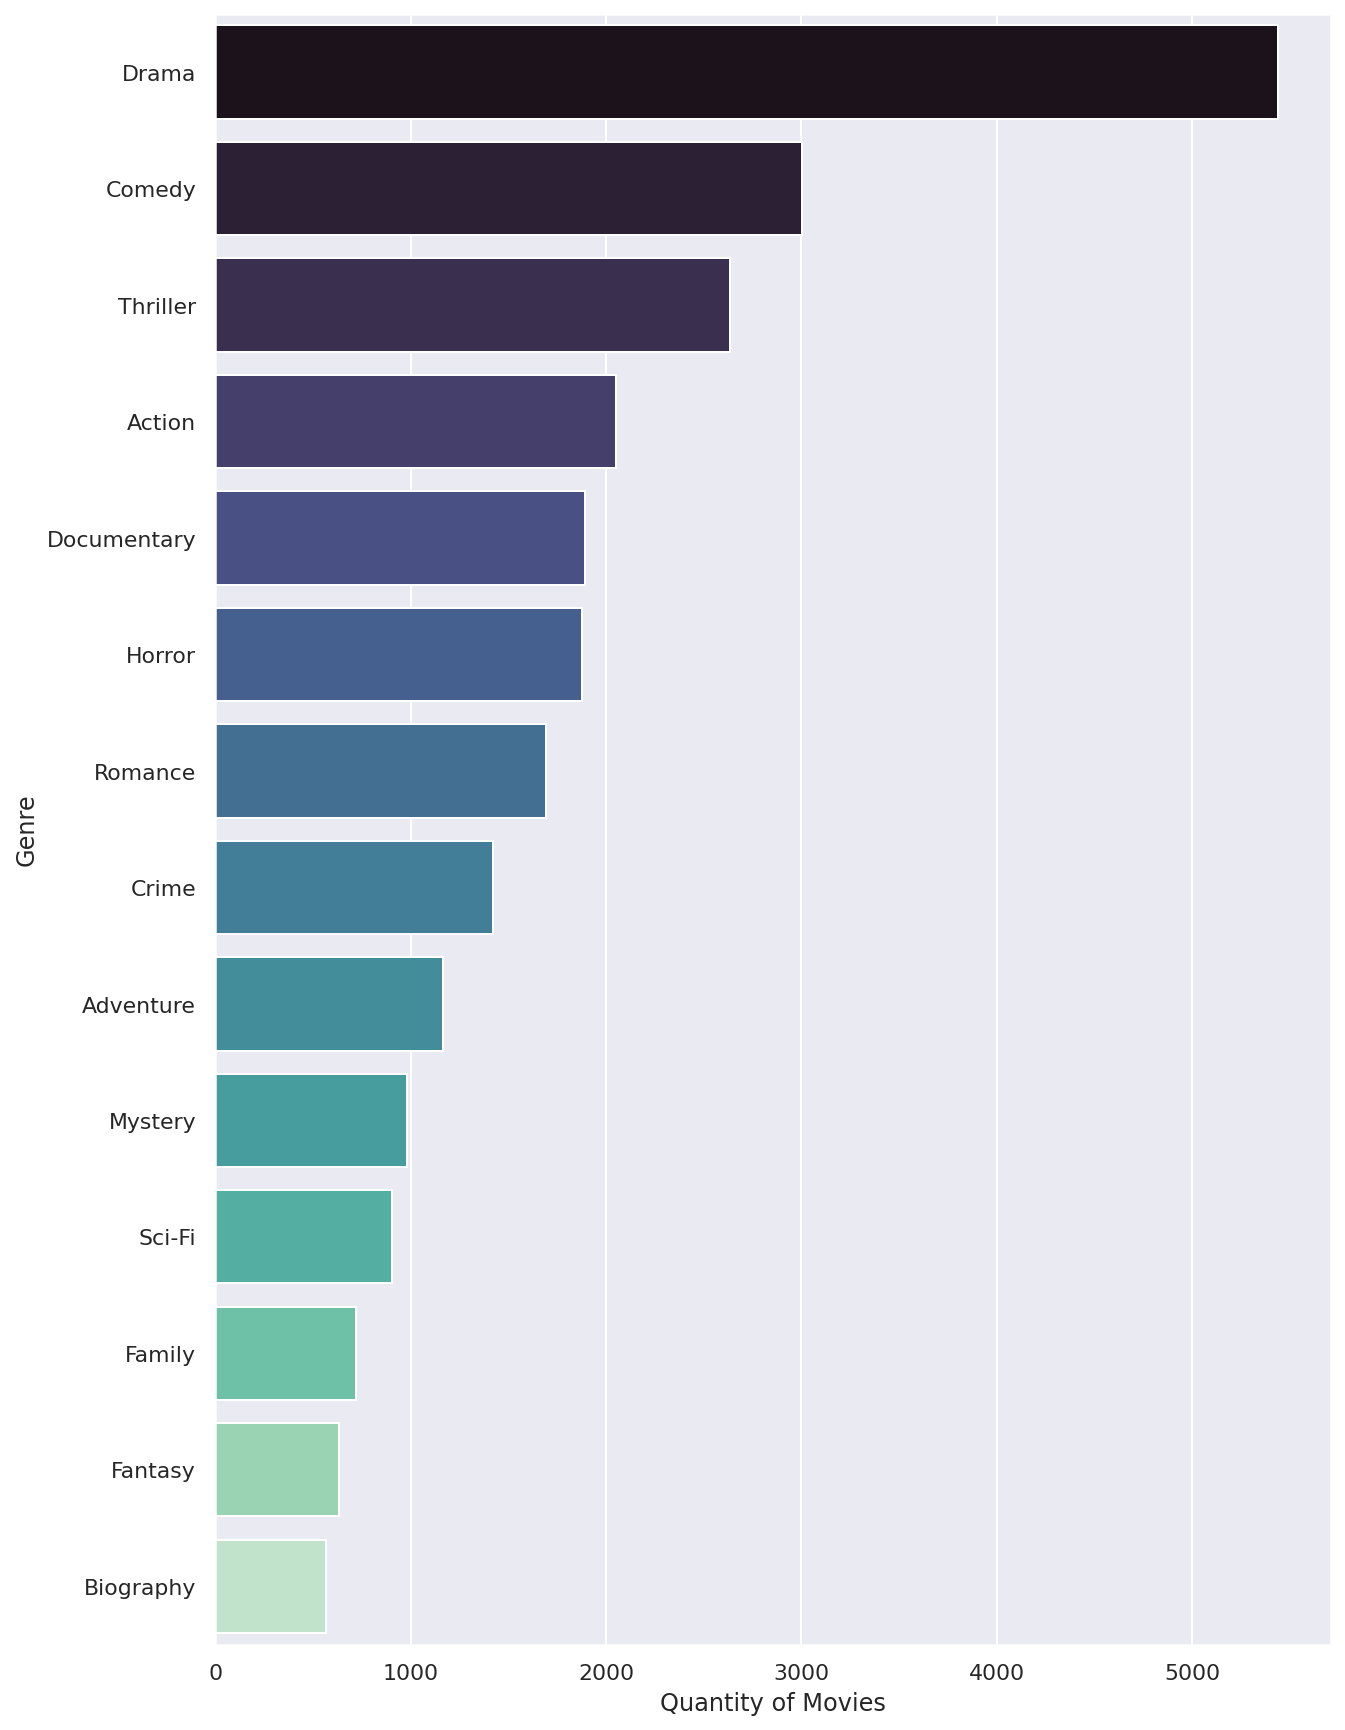

In [11]:
ssg=sprime['Genre'].str.split(',', expand=True).stack().value_counts()
mmg=mprime['Genres'].str.split(',', expand=True).stack().value_counts()


ax=sns.barplot(x=ssg.values[0:14], y=ssg.index[0:14], palette="rocket")
ax.set(xlabel='Quantity of Series', ylabel='Genre')
plt.show()


ax2=sns.barplot(x=mmg.values[0:14], y=mmg.index[0:14], palette="mako")
ax2.set(xlabel='Quantity of Movies', ylabel='Genre')
plt.show()



### Language Distribution
English has maximum popularity here

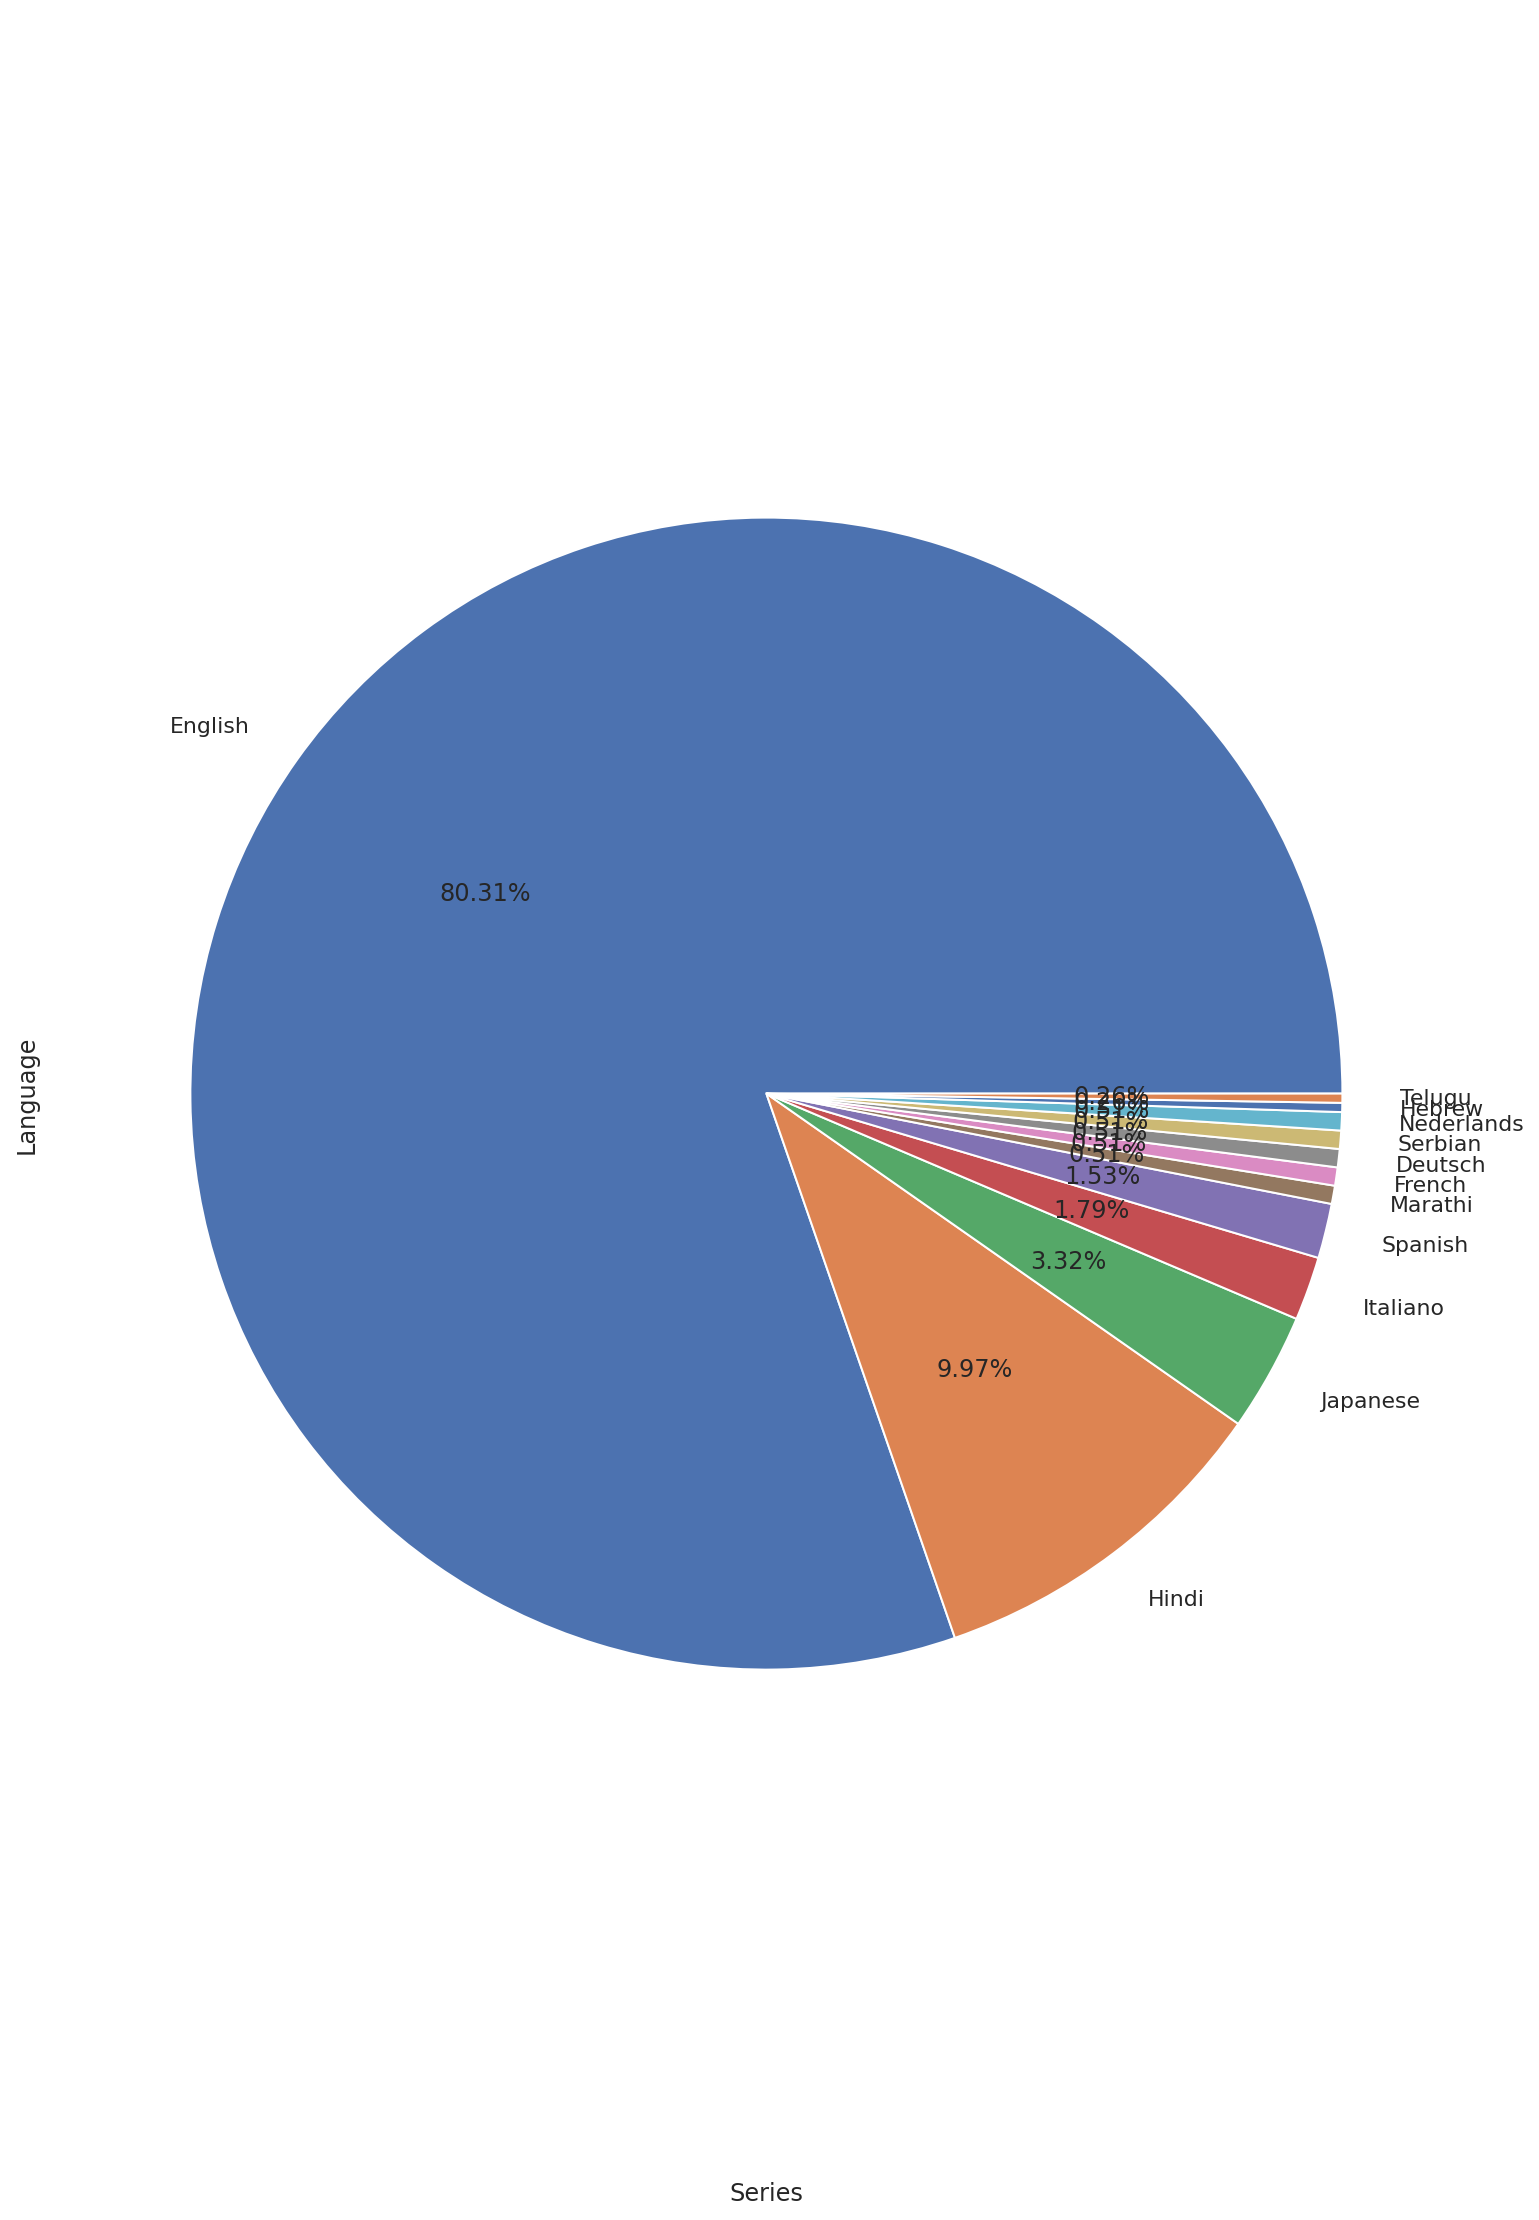

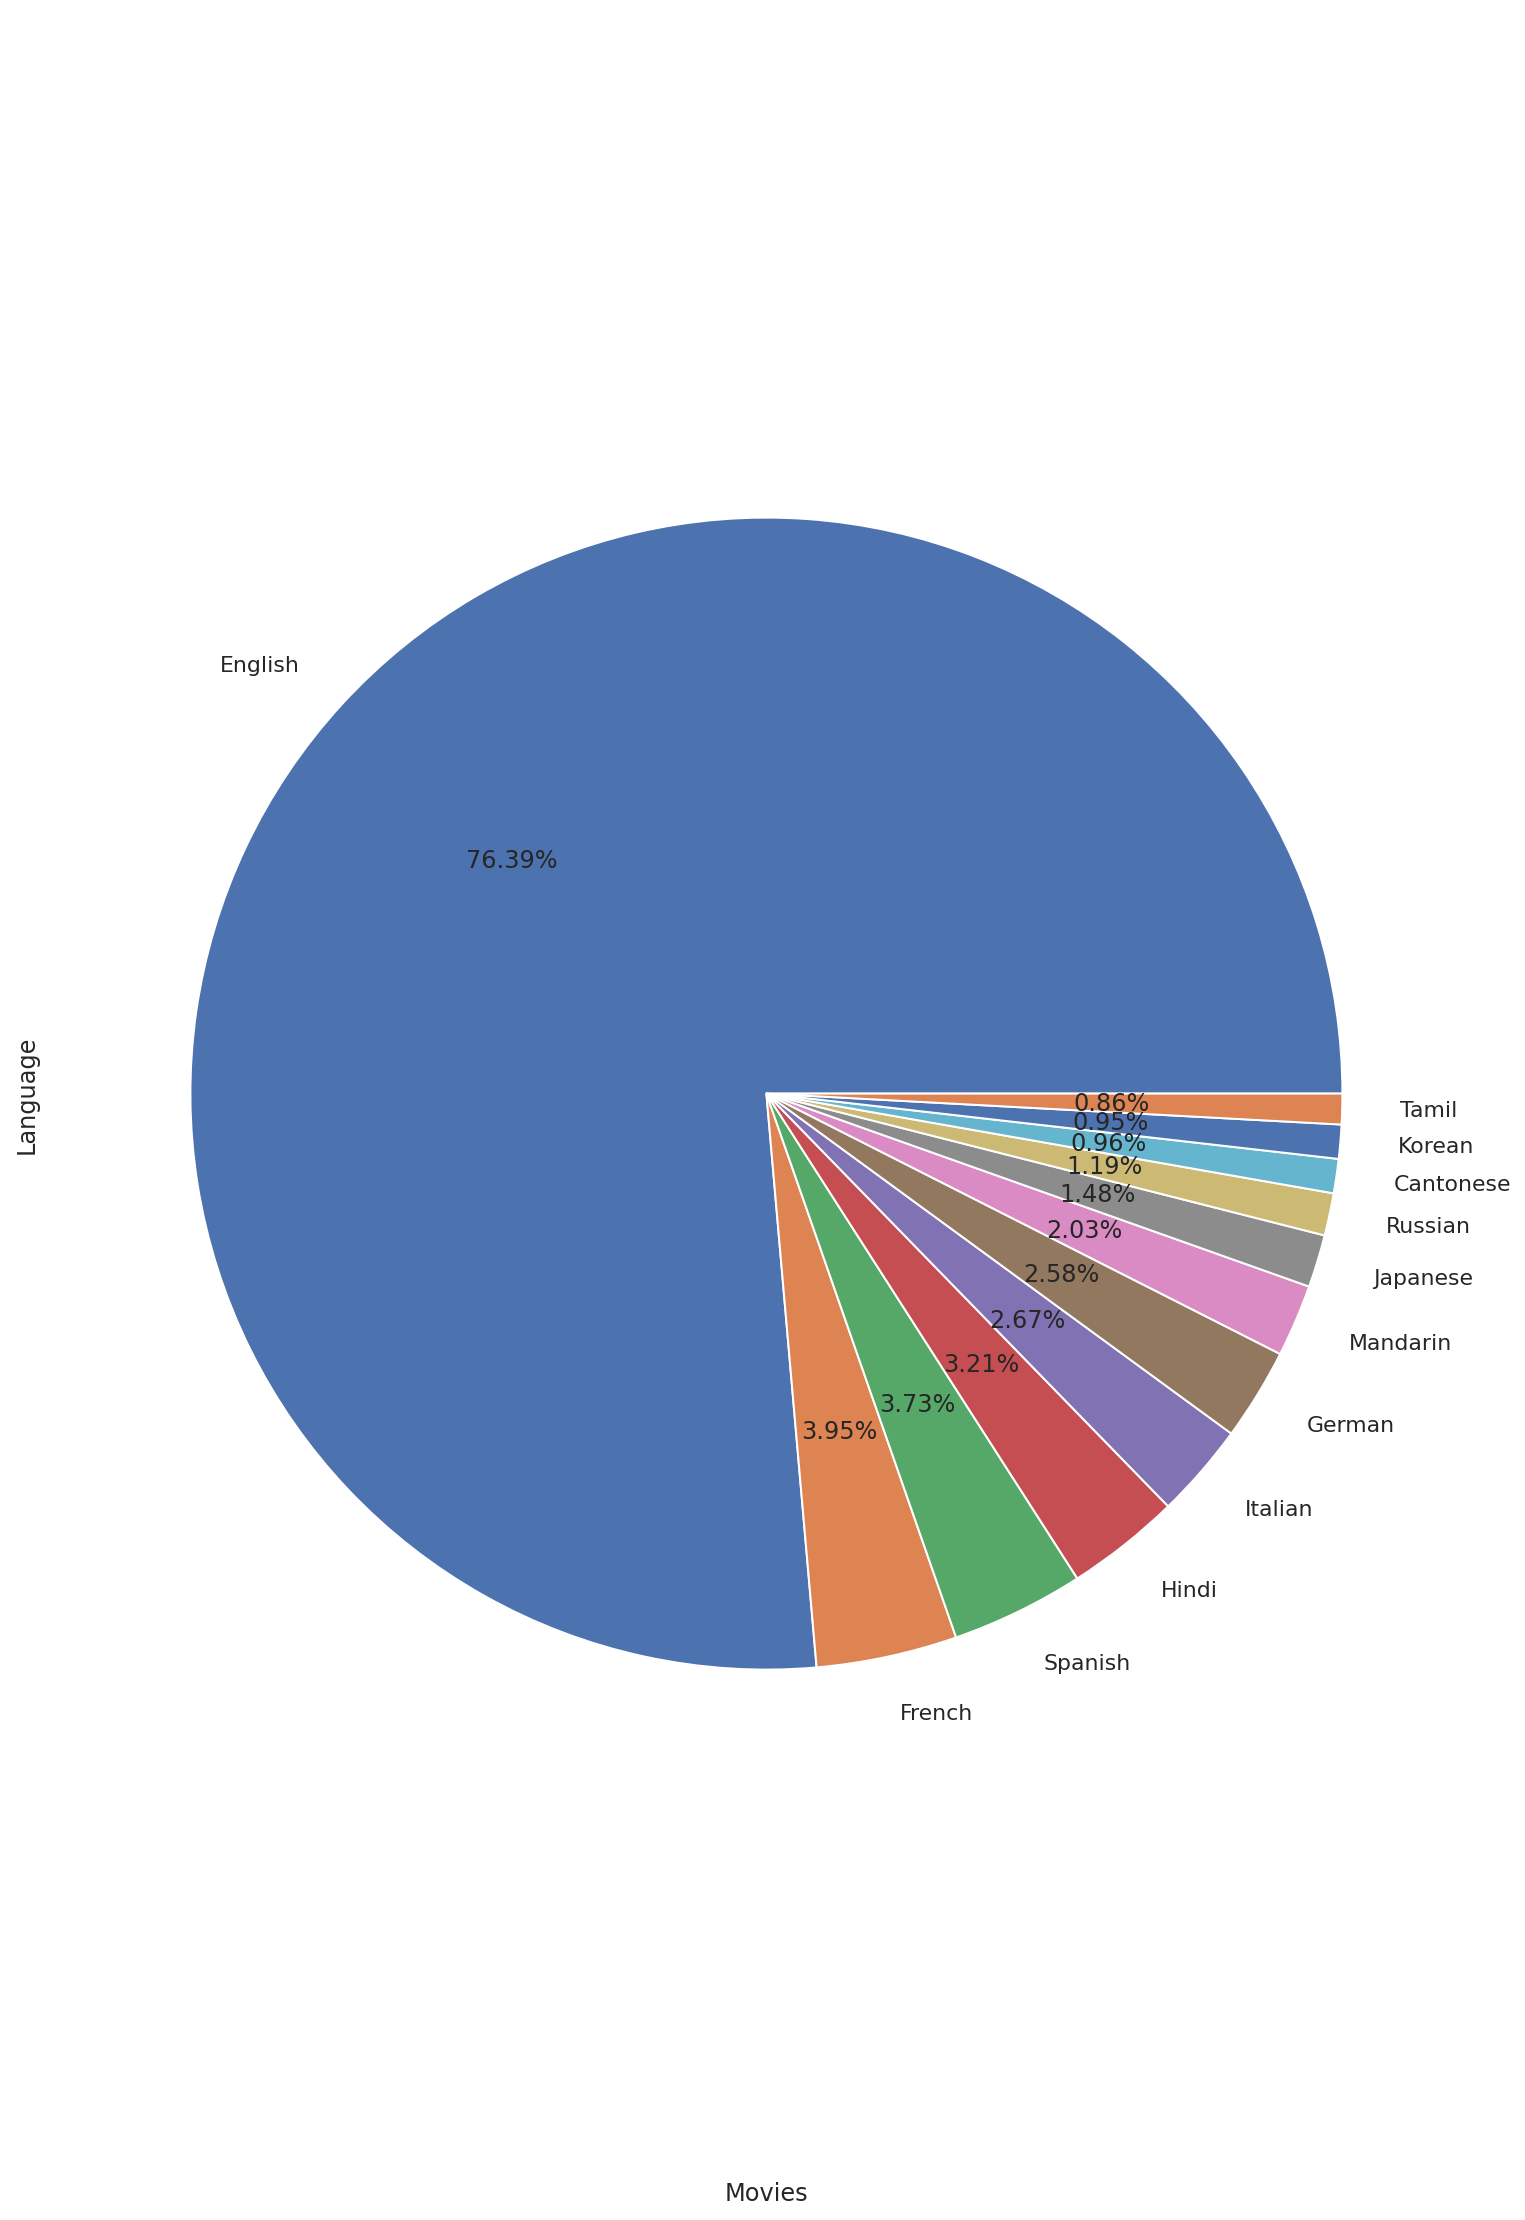

In [12]:
ssl=sprime['Language'].str.split(',\s+', expand=True).stack().value_counts()
mml=mprime['Language'].str.split(',', expand=True).stack().value_counts()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(ssl.values[0:12], labels = ssl.index[0:12],autopct='%1.2f%%')
ax.set(xlabel='Series', ylabel='Language')
plt.show()

fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])
ax2.axis('equal')

ax2.pie(mml.values[0:12], labels = mml.index[0:12],autopct='%1.2f%%')
ax2.set(xlabel='Movies', ylabel='Language')
plt.show()

### Age Rating
18+ is the most prominent age in Movies and 16+ in Series 

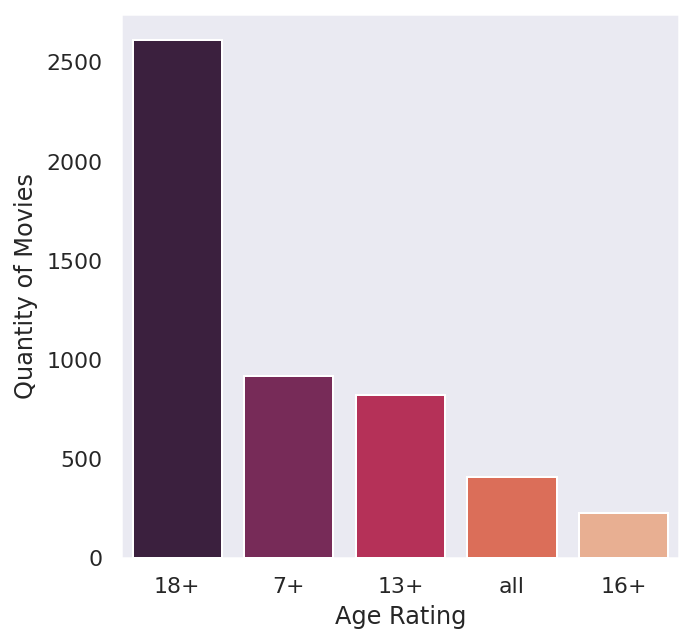

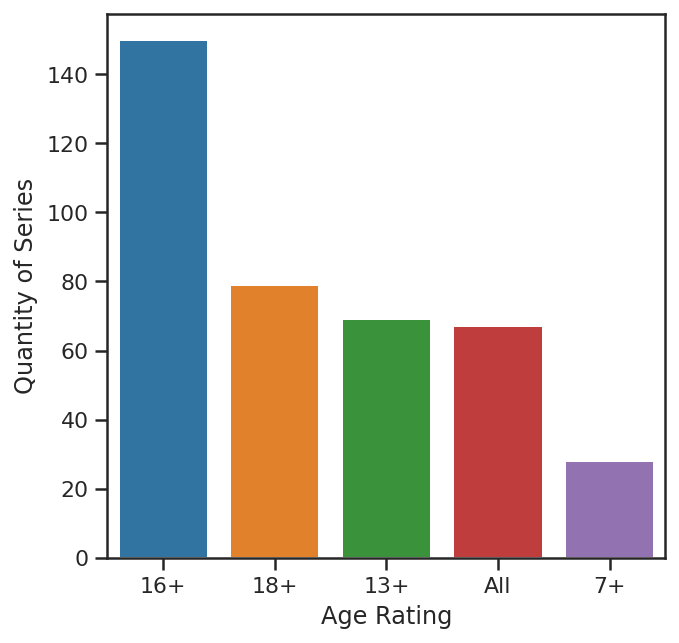

In [13]:
s_rate=sprime['Age of viewers'].value_counts()
m_rate=mprime['Age'].value_counts()


plt.figure(figsize=(5,5))
sns.set(style="dark")
ax = sns.countplot(x="Age", data=mprime, palette="rocket", order=mprime['Age'].value_counts().index[0:45])
ax.set(ylabel='Quantity of Movies', xlabel='Age Rating')
plt.show()


plt.figure(figsize=(5,5))
sns.set(style="ticks")
ax = sns.countplot(x="Age of viewers", data=sprime, palette="tab10", order=sprime['Age of viewers'].value_counts().index[0:45])
ax.set(ylabel='Quantity of Series', xlabel='Age Rating')
plt.show()


# DISNEY+ HOTSTAR ANALYSIS

In [14]:
mdisney= movie[movie['Disney+']==1]  

### IMDb score
In series, IMDb scores of 6-7 are common in both movies and series!

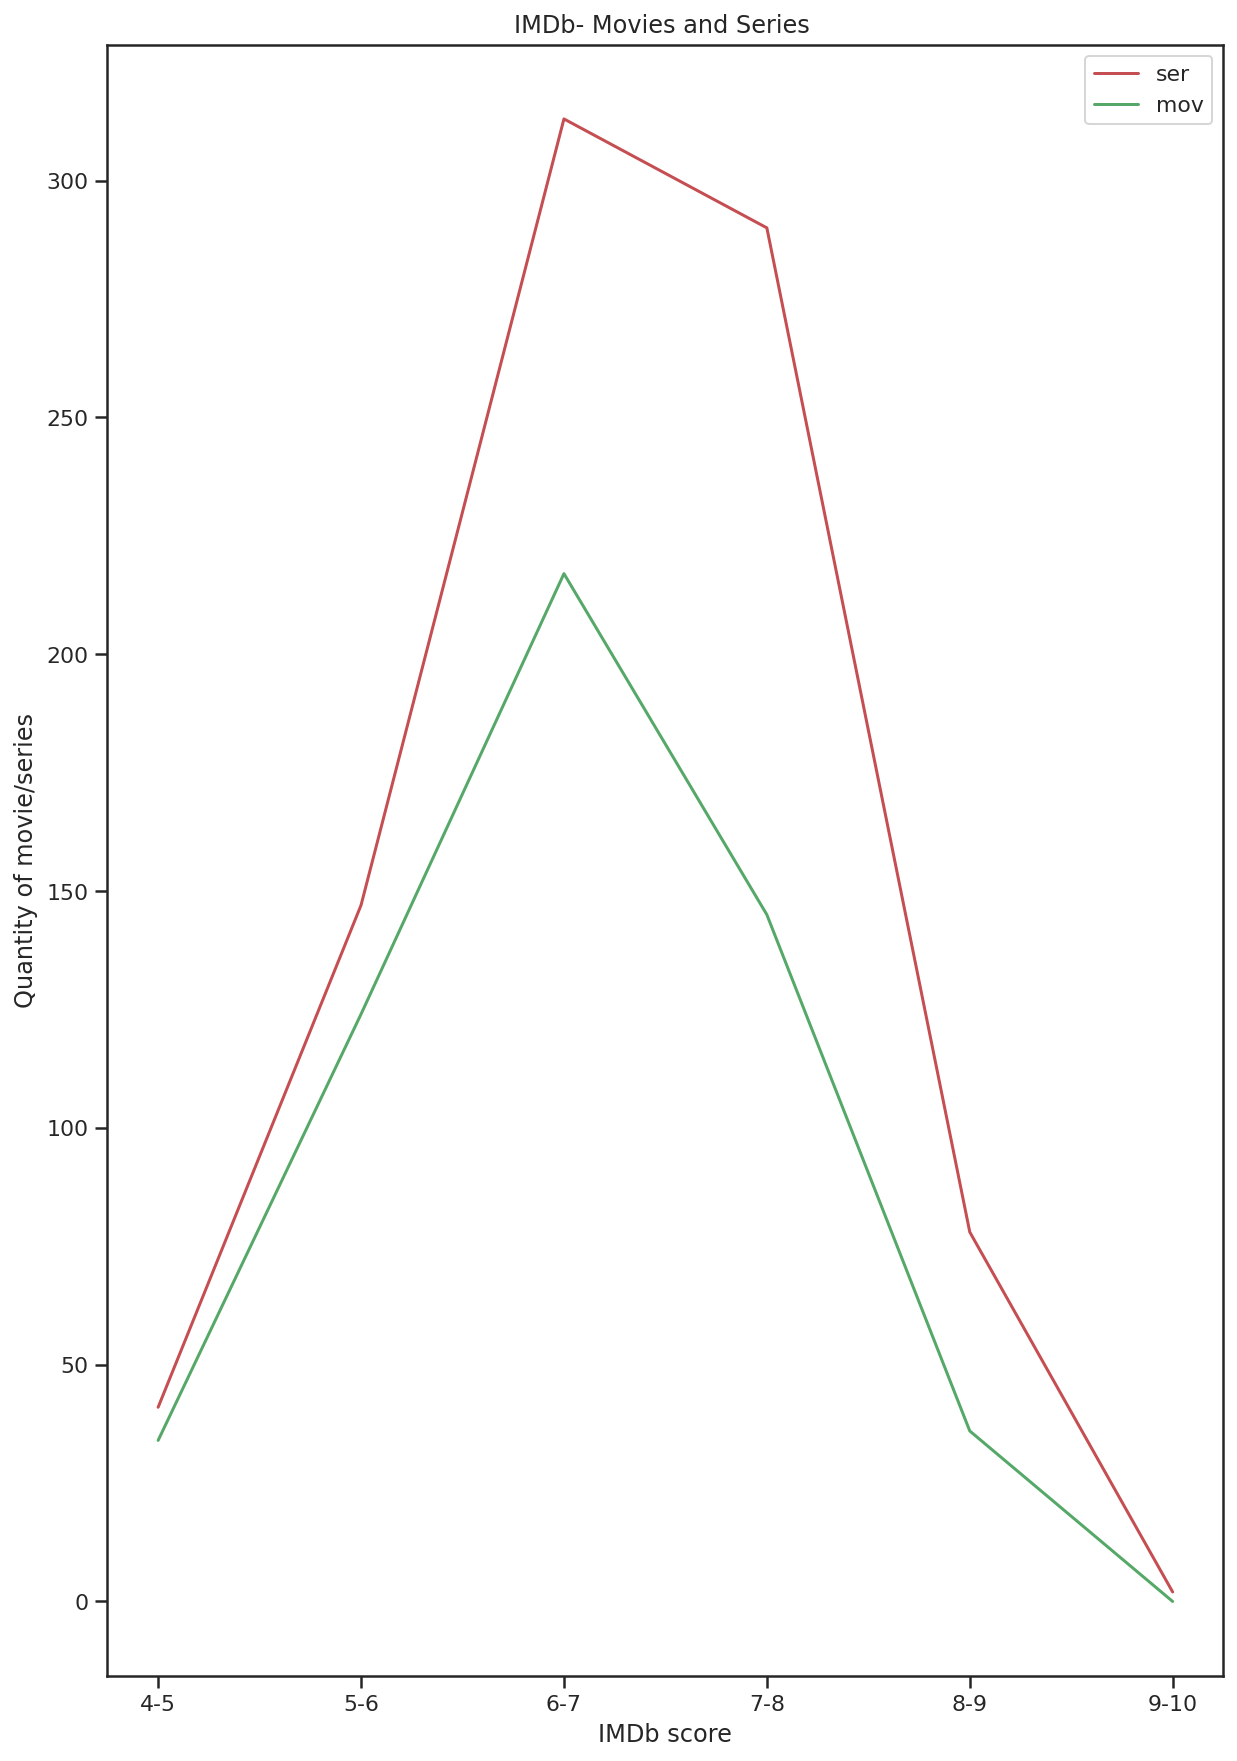

In [15]:
df4 = sdisney[(sdisney['imdb_rating']>=4.0) & (sdisney['imdb_rating']<5.0)]
df5 = sdisney[(sdisney['imdb_rating']>=5.0) & (sdisney['imdb_rating']<6.0)]
df6 = sdisney[(sdisney['imdb_rating']>=6.0) & (sdisney['imdb_rating']<7.0)]
df7 = sdisney[(sdisney['imdb_rating']>=7.0) & (sdisney['imdb_rating']<8.0)]
df8 = sdisney[(sdisney['imdb_rating']>=8.0) & (sdisney['imdb_rating']<9.0)]
df9 = sdisney[(sdisney['imdb_rating']>=9.0) & (sdisney['imdb_rating']<10.0)]
len(df4)
len(df5)
len(df6)
len(df7)
len(df8)
datas= [['4-5' ,len(df4) ] , ['5-6',len(df5)] , [ '6-7',len(df6)], [ '7-8',len(df7)], [ '8-9',len(df8)],[ '9-10',len(df9)]]  
ssi = pd.DataFrame(datas, columns = ['IMDb Rating', 'Series'])
 
df4 = mdisney[(mdisney['IMDb']>=4.0) & (mdisney['IMDb']<5.0)]
df5 = mdisney[(mdisney['IMDb']>=5.0) & (mdisney['IMDb']<6.0)]
df6 = mdisney[(mdisney['IMDb']>=6.0) & (mdisney['IMDb']<7.0)]
df7 = mdisney[(mdisney['IMDb']>=7.0) & (mdisney['IMDb']<8.0)]
df8 = mdisney[(mdisney['IMDb']>=8.0) & (mdisney['IMDb']<9.0)]
df9 = mdisney[(mdisney['IMDb']>=9.0) & (mdisney['IMDb']<10.0)]
len(df4)
len(df5)
len(df6)
len(df7)
len(df8)
datam= [['4-5' ,len(df4) ] , ['5-6',len(df5)] , [ '6-7',len(df6)], [ '7-8',len(df7)], [ '8-9',len(df8)],[ '9-10',len(df9)]] 
mmi = pd.DataFrame(datam, columns = ['IMDb Rating', 'Movies'])

 
# Plotting both the curves simultaneously
plt.plot(ssi['IMDb Rating'],ssi['Series'], color='r',label='ser')
plt.plot(mmi['IMDb Rating'],mmi['Movies'] ,color='g',label='mov')

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("IMDb score")
plt.ylabel("Quantity of movie/series")
plt.title("IMDb- Movies and Series ")
plt.legend()
plt.show()

### Genre 
Family wins followed by Comedy

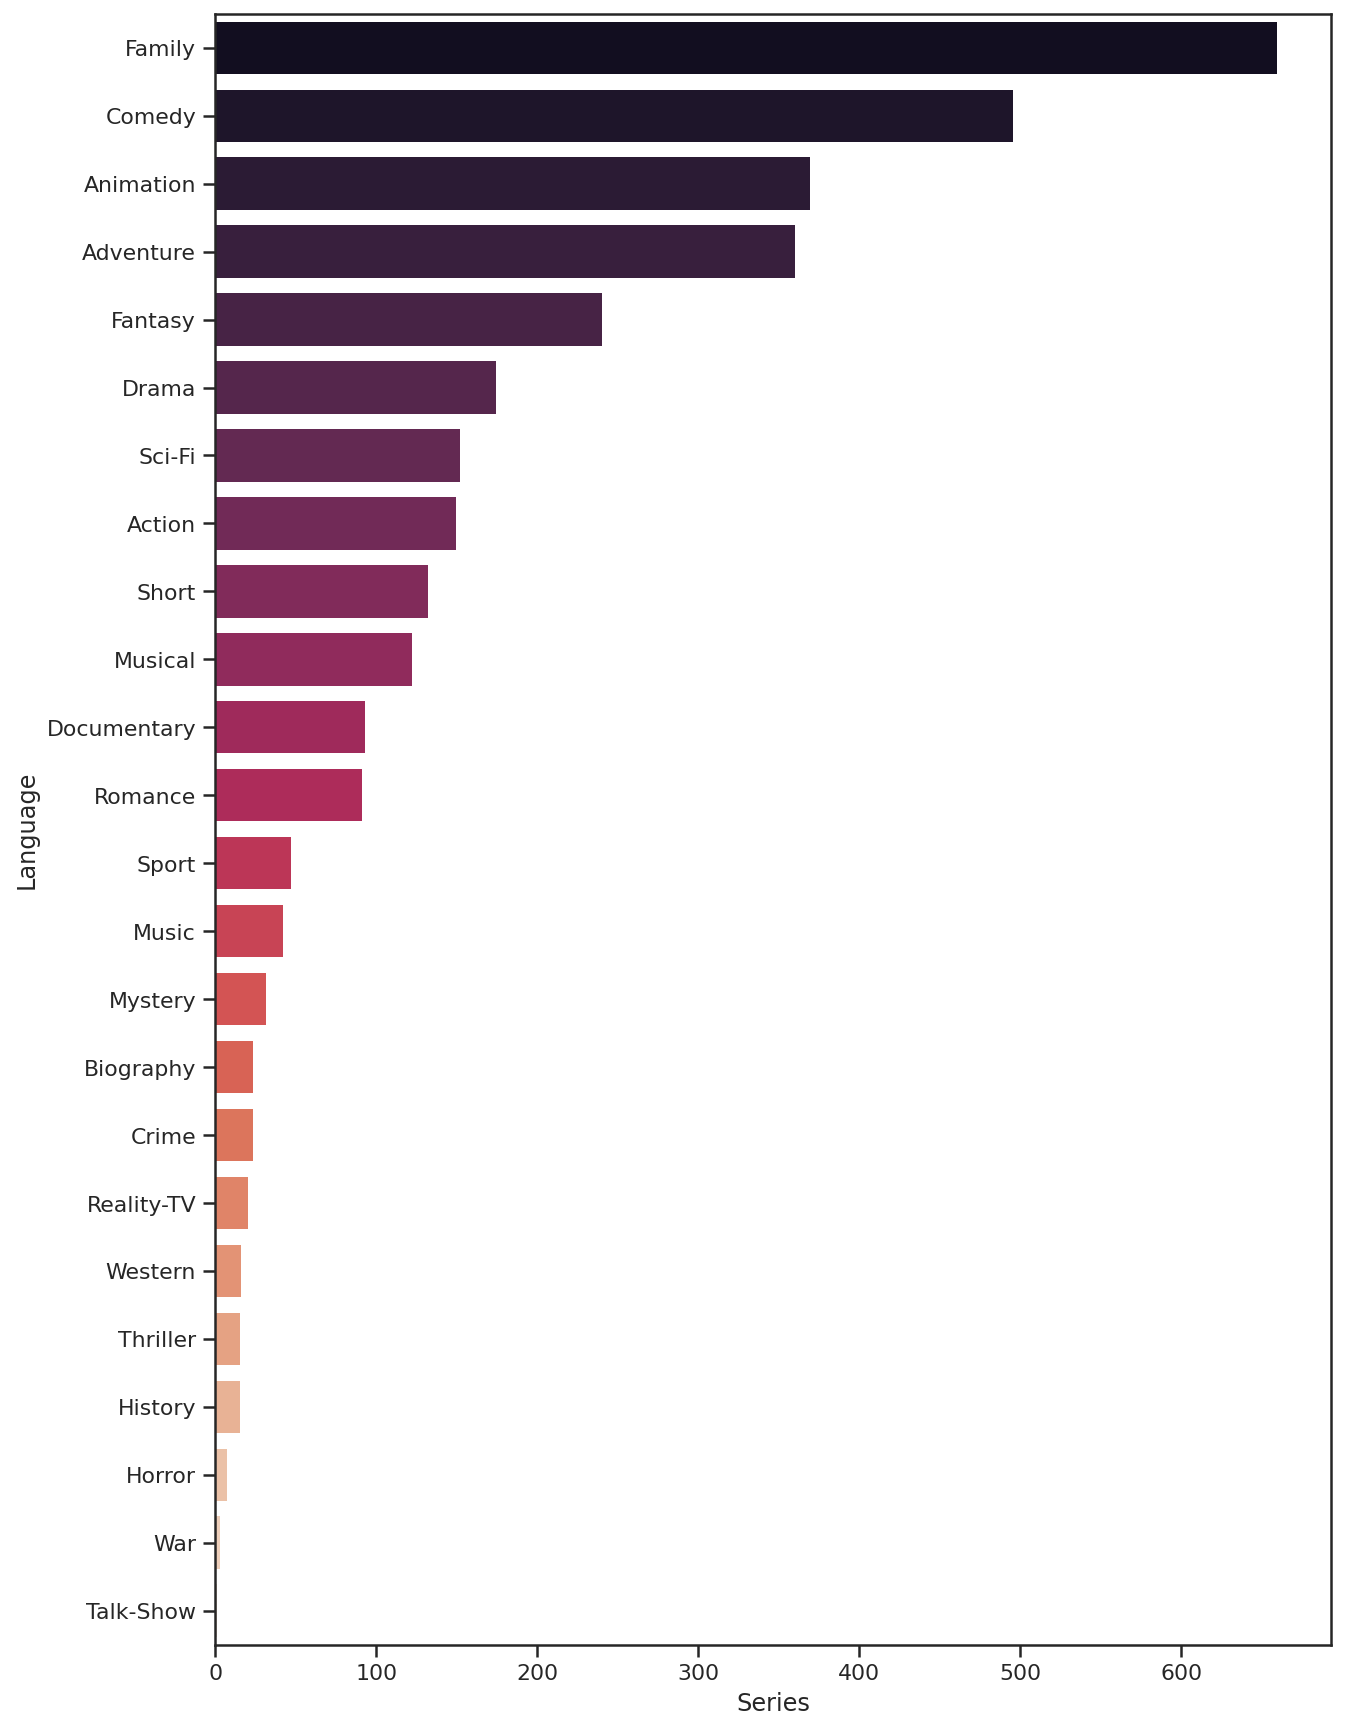

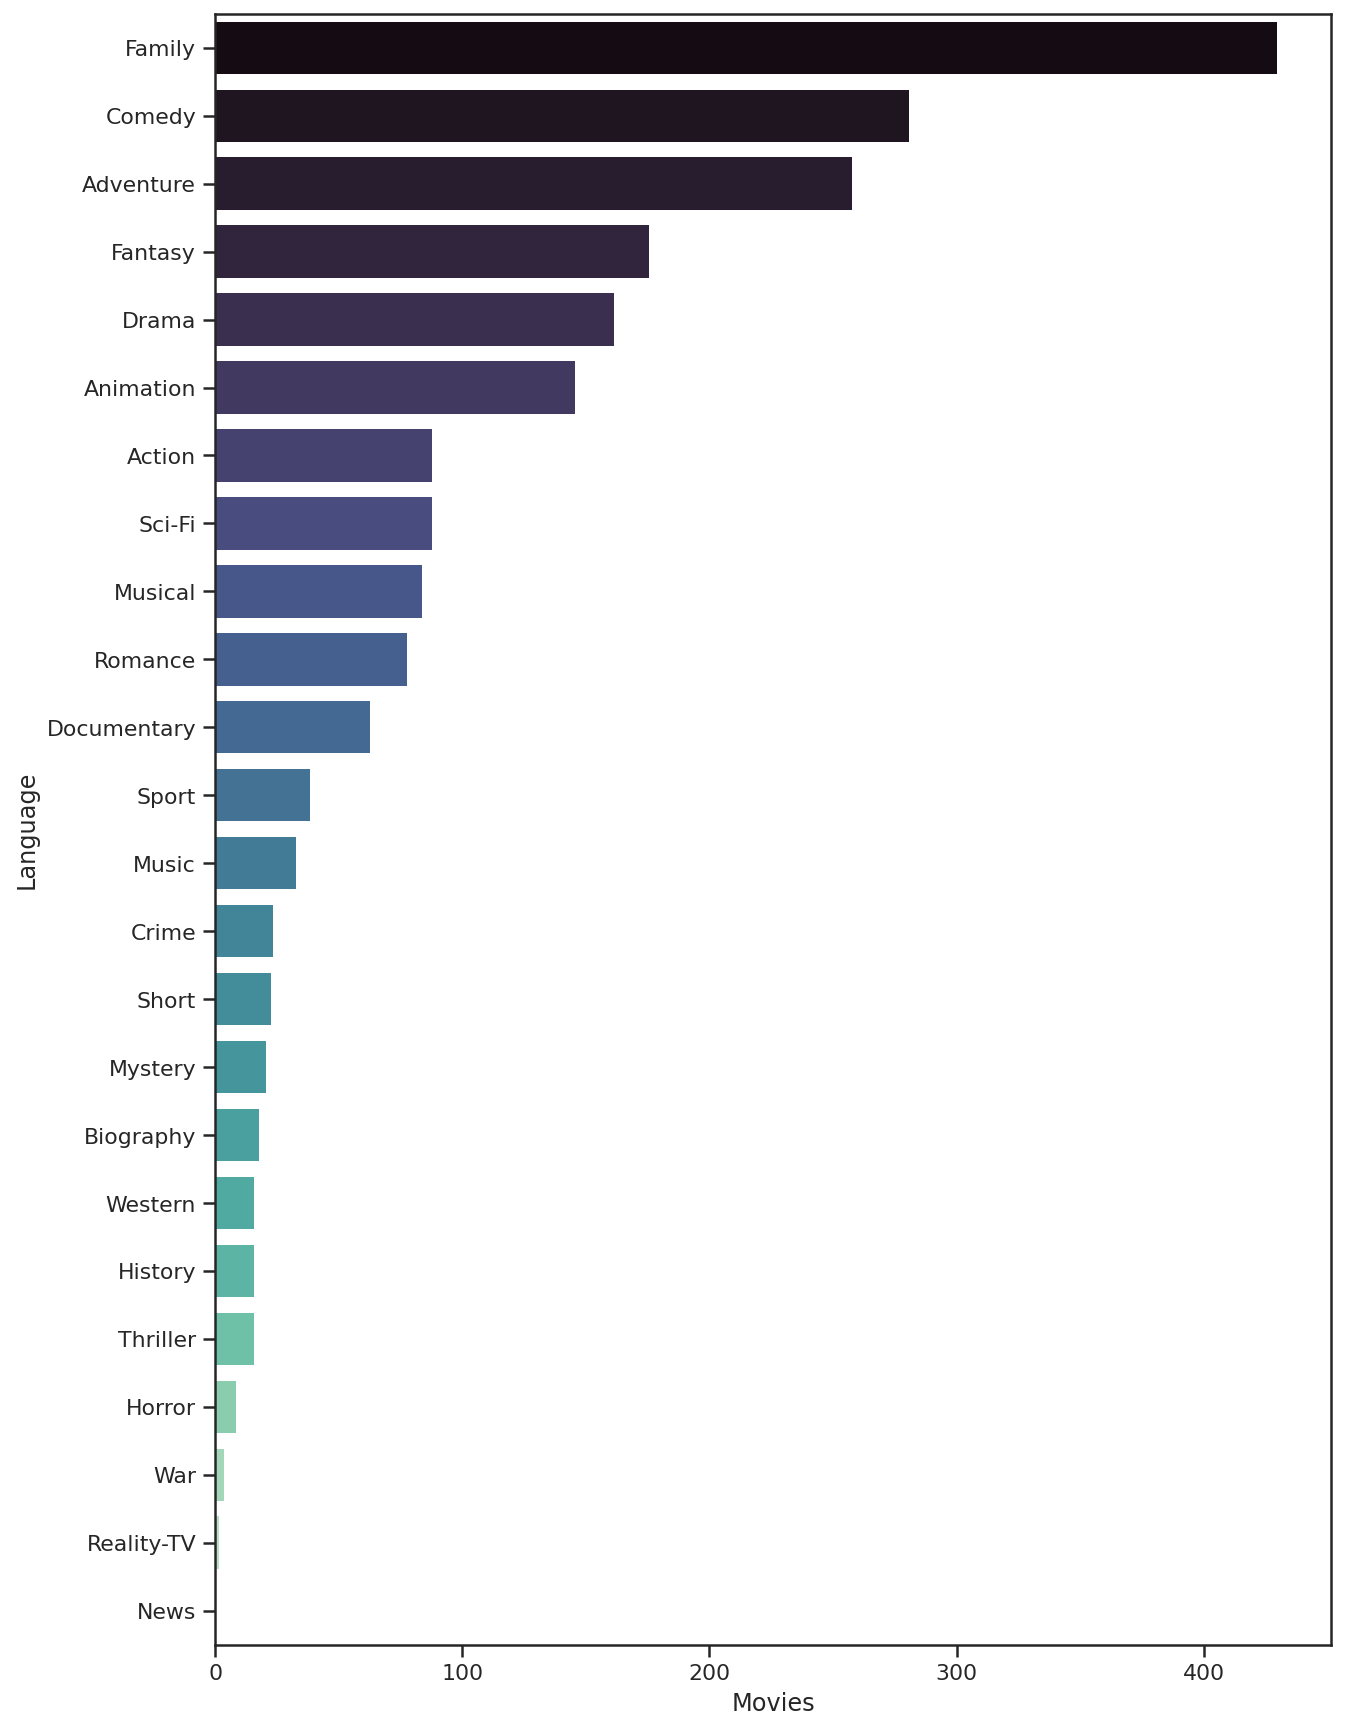

In [16]:
ssg=sdisney['genre'].str.split(',\s+', expand=True).stack().value_counts()
mmg=mdisney['Genres'].str.split(',', expand=True).stack().value_counts()


ax=sns.barplot(x=ssg.values[0:24], y=ssg.index[0:24], palette="rocket")
ax.set(xlabel='Series', ylabel='Language')
plt.show()

ax2=sns.barplot(x=mmg.values[0:24], y=mmg.index[0:24], palette="mako")
ax2.set(xlabel='Movies', ylabel='Language')
plt.show()



### Language Distribution
English has maximum popularity here

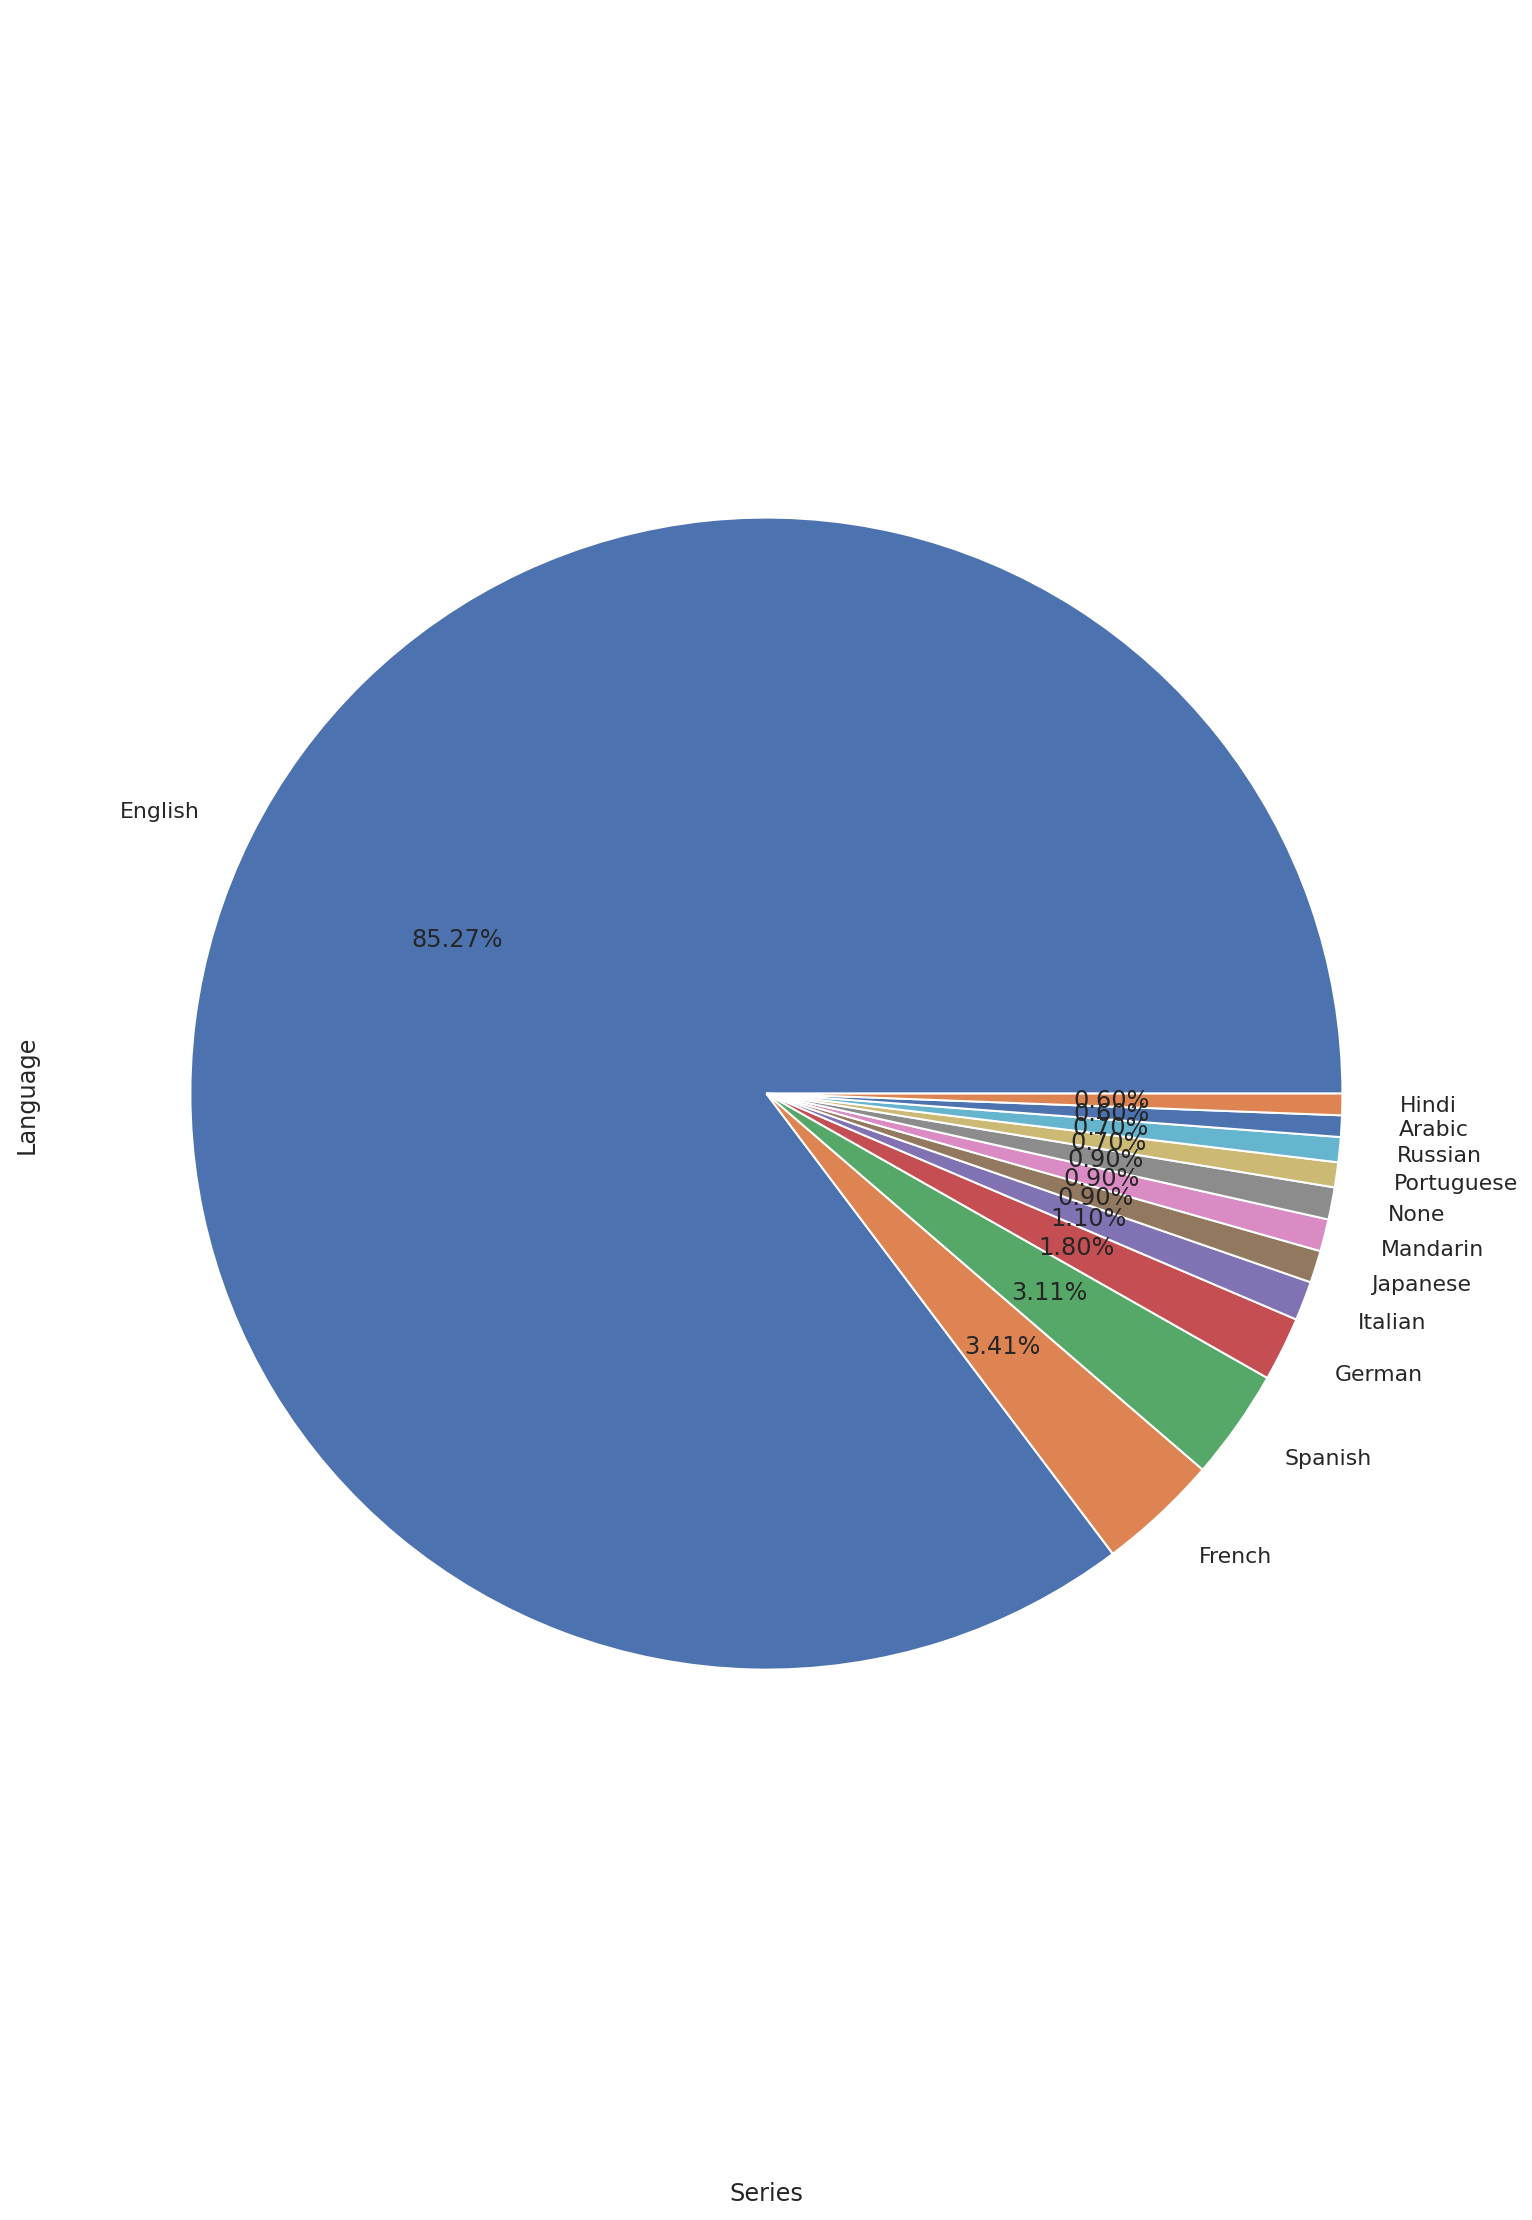

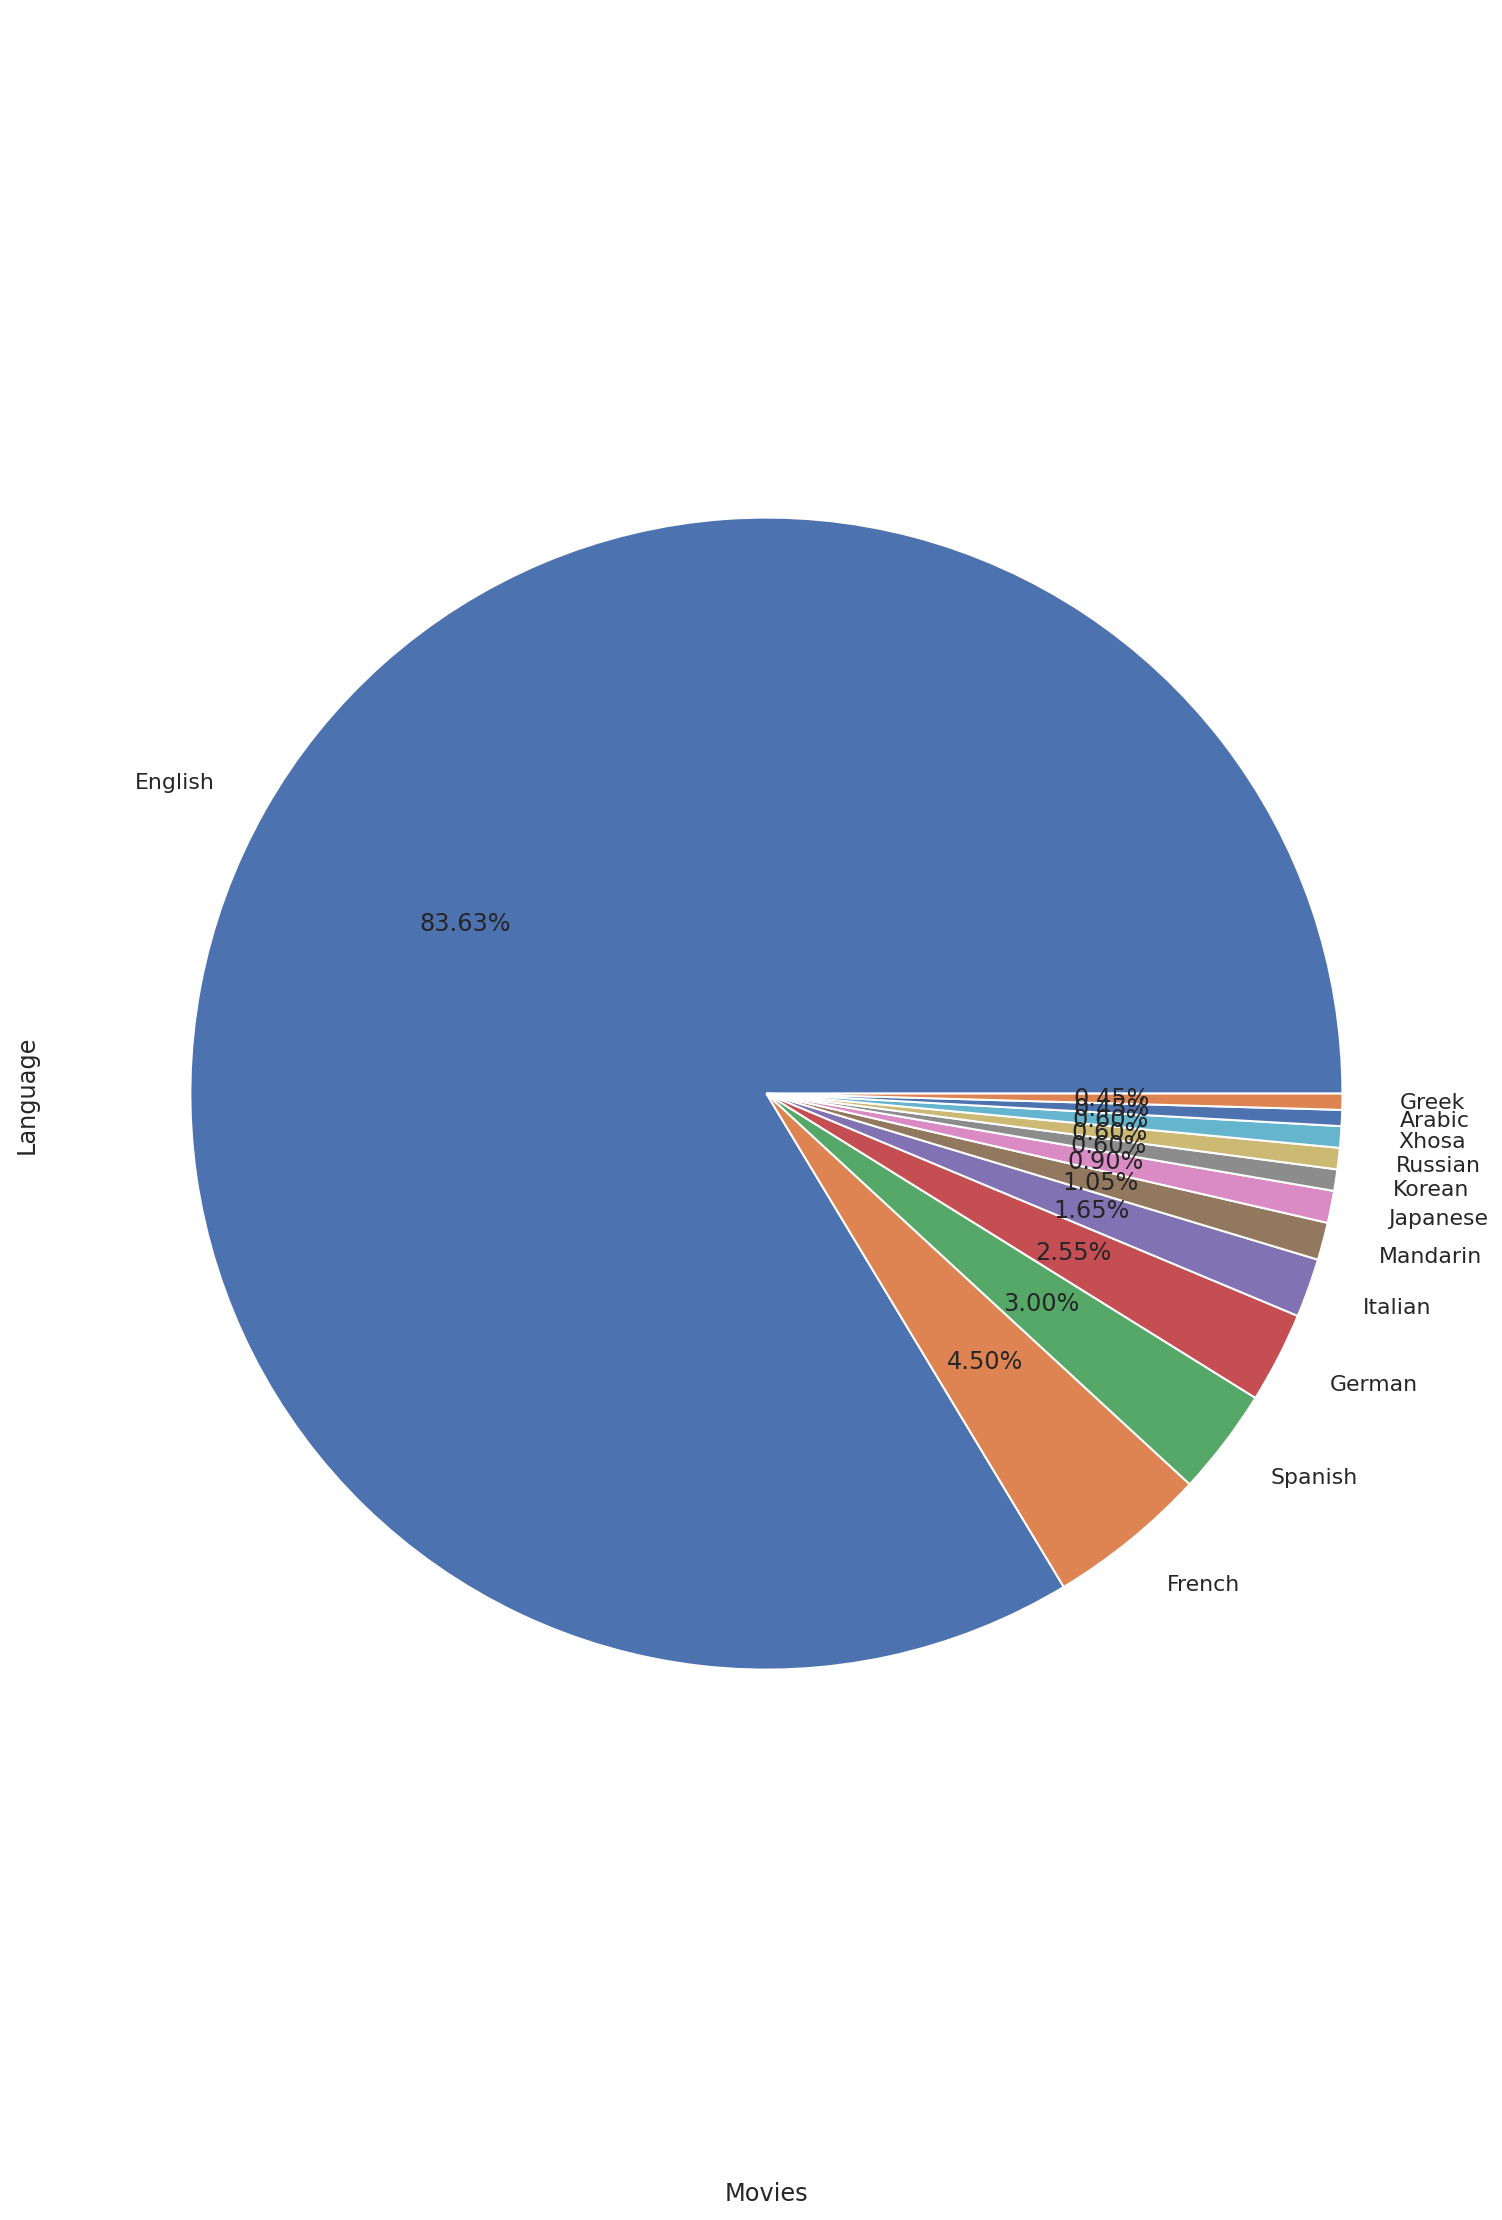

In [17]:
ssl=sdisney['language'].str.split(',\s+', expand=True).stack().value_counts()
mml=mdisney['Language'].str.split(',', expand=True).stack().value_counts()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(ssl.values[0:12], labels = ssl.index[0:12],autopct='%1.2f%%')
ax.set(xlabel='Series', ylabel='Language')
plt.show()

fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])
ax2.axis('equal')
ax2.set(xlabel='Movies', ylabel='Language')
ax2.pie(mml.values[0:12], labels = mml.index[0:12],autopct='%1.2f%%')
plt.show()

### Age Rating
18+ is the most prominent Age Rating 

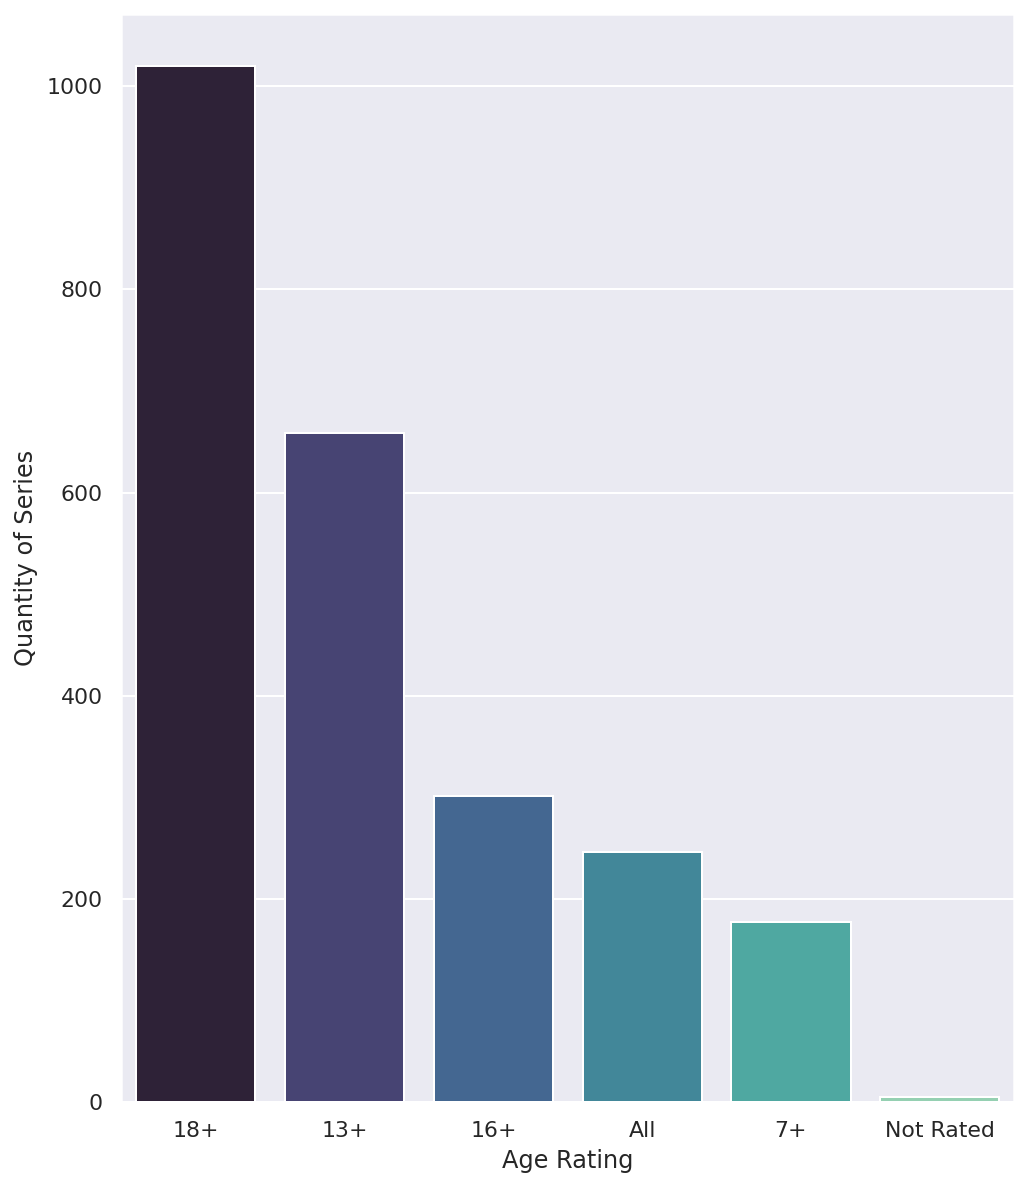

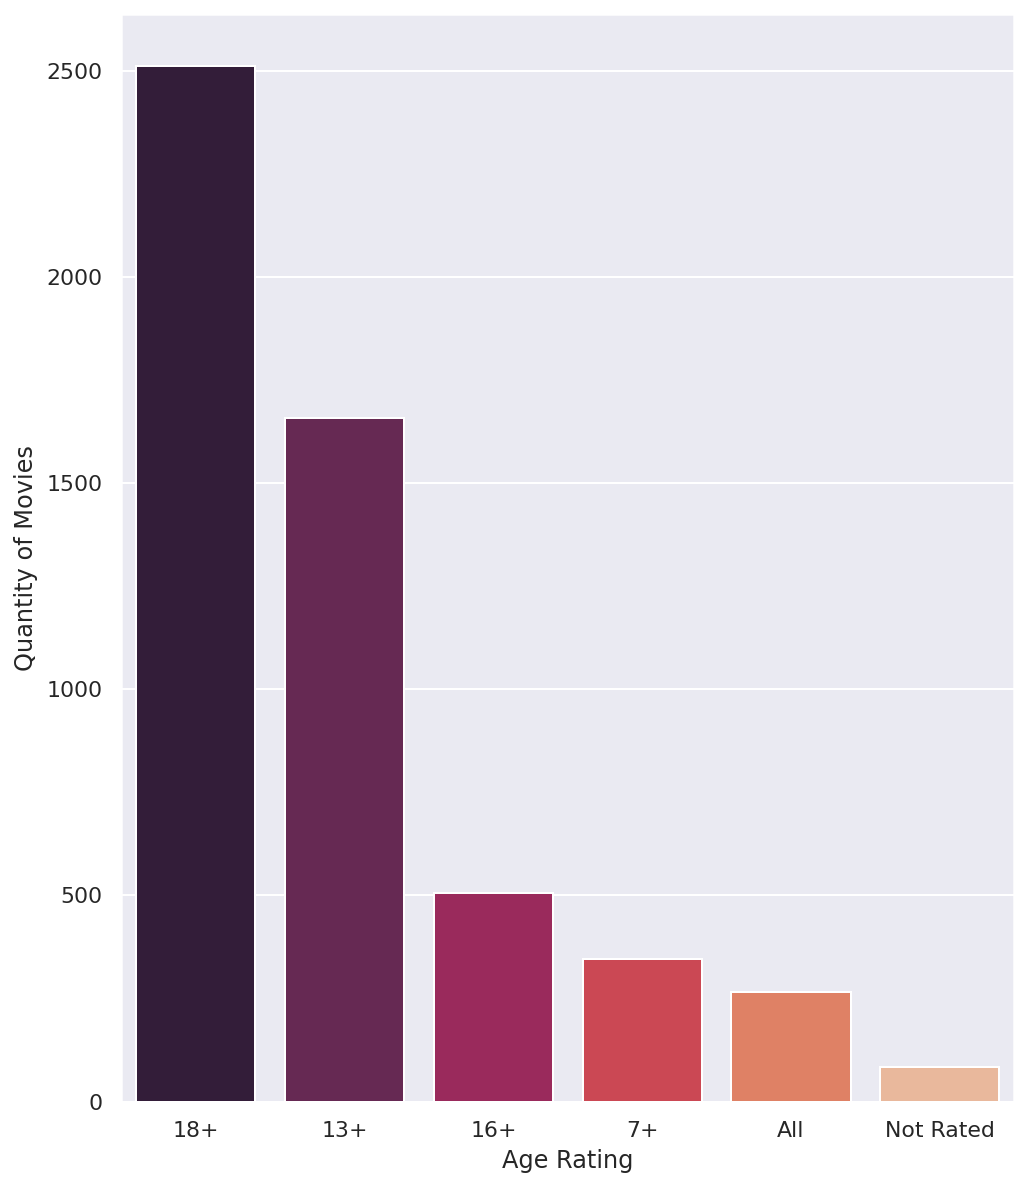

In [18]:
ratings={
'TV-MA', '18+'
'TV-14', '13+'
'PG-13', '13+'
'TV-PG', '16+'
'TV-Y7', '7+'
'PG', '7+'
'G', 'All'
'TV-Y', 'All'
'TV-G', 'All'
'NR', 'Not Rated'
'UNRATED', 'Not Rated' 
'Unrated', 'Not Rated' 
'NOT RATED', 'Not Rated'
'APPROVED', 'Not Rated'
'Approved', 'Not Rated'
'N/A', 'Not Rated'
'Passed', 'Not Rated'
'PASSED', 'Not Rated'
'R', '18+'
'NC-17', '18+'
'TV-Y7-FV', '7+'
}

sdisney['rating']=sdisney['rated'].replace(ratings)
mdisney['Age'] = mdisney['Age'].replace(np.nan, 'Not Rated')

s_rate=sdisney['rated'].value_counts()
m_rate=mdisney['Age'].value_counts()

plt.figure(figsize=(8,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=sd2, palette="mako", order=sd2['rating'].value_counts().index[0:15])
ax.set(ylabel='Quantity of Series', xlabel='Age Rating')
plt.show()

plt.figure(figsize=(8,10))
sns.set(style="darkgrid")
ax2 = sns.countplot(x="rating", data=md2, palette="rocket", order=md2['rating'].value_counts().index[0:15])
ax2.set(ylabel='Quantity of Movies', xlabel='Age Rating')
plt.show()